# Lead Scoring Case Study

**<font color = red>Problem Statement:</font>**

**X Education**  sells online courses to industry professionals and although **X Education** gets a lot of leads, its lead conversion rate is very poor..

**<font color = Green>The company wants to know:</font>**

- How to make this process more efficient, the company wishes to identify the most potential leads, also known as **Hot Leads**. 
- If these set of leads are successfully identified, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. 

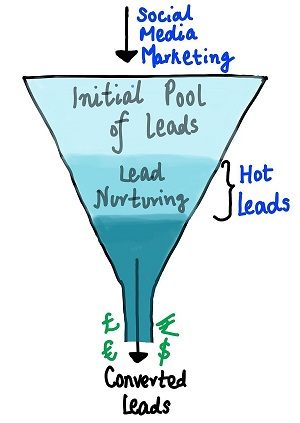

**<font color = BLUE>Business Goal:</font>**

- To find promising leads, i.e. the leads that are most likely to convert into paying customers.
- The company requires to build a model wherein: the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance
- The CEO, in particular, wants a ballpark of the target lead conversion rate to be around 80%.

## Step 1: Reading and Understanding the Data

### Importing all required libraries

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# pip install  -  u scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [4]:
# for model evaluation
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

### Data Reading & Data Types 

In [5]:
#Importing dataset
leads_data = pd.read_csv('Leads.csv')
leads_df= leads_data.copy()

In [6]:
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [7]:
print("Rows:",leads_df.shape[0], "Columns:",leads_df.shape[1])

Rows: 9240 Columns: 37


In [8]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [9]:
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [10]:
leads_df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

### Data Cleaning

In [11]:
# checking for null values
leads_df.isnull().mean().sort_values(ascending=False)

Lead Quality                                     0.515909
Asymmetrique Activity Index                      0.456494
Asymmetrique Profile Score                       0.456494
Asymmetrique Activity Score                      0.456494
Asymmetrique Profile Index                       0.456494
Tags                                             0.362879
Lead Profile                                     0.293182
What matters most to you in choosing a course    0.293182
What is your current occupation                  0.291126
Country                                          0.266342
How did you hear about X Education               0.238853
Specialization                                   0.155628
City                                             0.153680
Page Views Per Visit                             0.014827
TotalVisits                                      0.014827
Last Activity                                    0.011147
Lead Source                                      0.003896
Receive More U

#### Replacing 'select' with Nan

In [12]:
leads_df = leads_df.replace('Select', np.nan)

In [13]:
# checking for null values after replacing 'Select with nan'
leads_df.isnull().mean().sort_values(ascending=False)

How did you hear about X Education               0.784632
Lead Profile                                     0.741883
Lead Quality                                     0.515909
Asymmetrique Profile Score                       0.456494
Asymmetrique Activity Score                      0.456494
Asymmetrique Activity Index                      0.456494
Asymmetrique Profile Index                       0.456494
City                                             0.397078
Specialization                                   0.365801
Tags                                             0.362879
What matters most to you in choosing a course    0.293182
What is your current occupation                  0.291126
Country                                          0.266342
Page Views Per Visit                             0.014827
TotalVisits                                      0.014827
Last Activity                                    0.011147
Lead Source                                      0.003896
Receive More U

#### dropping the columns with missing values greater than or equal to 35%

In [14]:
leads_df.drop(['How did you hear about X Education','Lead Profile','Lead Quality','Asymmetrique Profile Score','Asymmetrique Activity Score','Asymmetrique Activity Index','Asymmetrique Profile Index','City'],axis=1,inplace=True)

In [15]:
leads_df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums          

In [16]:
leads_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [17]:
leads_df['Do Not Email'].value_counts(dropna=False,normalize=True)

No     0.920563
Yes    0.079437
Name: Do Not Email, dtype: float64

In [18]:
leads_df['Do Not Call'].value_counts(dropna=False,normalize=True)

No     0.999784
Yes    0.000216
Name: Do Not Call, dtype: float64

In [19]:
leads_df['What matters most to you in choosing a course'].value_counts(dropna=False,normalize=True)

Better Career Prospects      0.706494
NaN                          0.293182
Flexibility & Convenience    0.000216
Other                        0.000108
Name: What matters most to you in choosing a course, dtype: float64

In [20]:
leads_df['Through Recommendations'].value_counts(dropna=False,normalize=True)

No     0.999242
Yes    0.000758
Name: Through Recommendations, dtype: float64

In [21]:
leads_df['Receive More Updates About Our Courses'].value_counts(dropna=False,normalize=True)

No    1.0
Name: Receive More Updates About Our Courses, dtype: float64

In [22]:
leads_df['Update me on Supply Chain Content'].value_counts(dropna=False,normalize=True)

No    1.0
Name: Update me on Supply Chain Content, dtype: float64

In [23]:
leads_df['Get updates on DM Content'].value_counts(dropna=False,normalize=True)

No    1.0
Name: Get updates on DM Content, dtype: float64

In [24]:
leads_df['I agree to pay the amount through cheque'].value_counts(dropna=False,normalize=True)

No    1.0
Name: I agree to pay the amount through cheque, dtype: float64

In [25]:
leads_df['A free copy of Mastering The Interview'].value_counts(dropna=False,normalize=True)

No     0.687446
Yes    0.312554
Name: A free copy of Mastering The Interview, dtype: float64

In [26]:
leads_df['Last Notable Activity'].value_counts(dropna=False,normalize=True)

Modified                        0.368723
Email Opened                    0.305952
SMS Sent                        0.235065
Page Visited on Website         0.034416
Olark Chat Conversation         0.019805
Email Link Clicked              0.018723
Email Bounced                   0.006494
Unsubscribed                    0.005087
Unreachable                     0.003463
Had a Phone Conversation        0.001515
Email Marked Spam               0.000216
Approached upfront              0.000108
Resubscribed to emails          0.000108
View in browser link Clicked    0.000108
Form Submitted on Website       0.000108
Email Received                  0.000108
Name: Last Notable Activity, dtype: float64

In [27]:
leads_df['Converted'].value_counts(dropna=False,normalize=True)

0    0.61461
1    0.38539
Name: Converted, dtype: float64

**As per the information provided in Leads Data Dictionary and looking at data above, below are few columns that can be removed:**
- Prospect ID: The leads can be identified through unique 'Lead Number'
- Search: This will help sales team to understand on which forum to invest, it will not help in identifying if the contact will be a lead or not
- Magazine: has a constant value and does not contribute any information to the model
- Newspaper Article: This will help sales team to understand on which forum to invest, it will not help in identifying if the contact will be a lead or not
- X Education Forums: This will help sales team to understand on which forum to invest, it will not help in identifying if the contact will be a lead or not
- Newspaper: This will help sales team to understand on which forum to invest, it will not help in identifying if the contact will be a lead or not
- Digital Advertisement: This will help sales team to understand on which forum to invest, it will not help in identifying if the contact will be a lead or not
- A free copy of Mastering The Interview
- Update me on Supply Chain Content: has a constant value and does not contribute any information to the model
- Get updates on DM Content: has a constant value and does not contribute any information to the model
- Receive More Updates About Our Courses: has a constant value and does not contribute any information to the model
- I agree to pay the amount through cheque: has a constant value and does not contribute any information to the model
- Do not Email: are more bending on one consant and does not contribute any information to the model. A constant column can also cause problems with the estimation of the coefficients, as it can create a singular matrix that cannot be inverted
- Do not call: are more bending on one consant and does not contribute any information to the model. A constant column can also cause problems with the estimation of the coefficients, as it can create a singular matrix that cannot be inverted
- What matters most to you in choosing a course- are more bending on one consant and does not contribute any information to the model. A constant column can also cause problems with the estimation of the coefficients, as it can create a singular matrix that cannot be inverted
- Through Recommendations: are more bending on one consant and does not contribute any information to the model. A constant column can also cause problems with the estimation of the coefficients, as it can create a singular matrix that cannot be inverted.

In [28]:
Leads_New = leads_df[['Lead Number','Lead Origin','Lead Source','Specialization','Tags','Converted','TotalVisits','Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity','Country', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']]

In [29]:
Leads_New.nunique()

Lead Number                               9240
Lead Origin                                  5
Lead Source                                 21
Specialization                              18
Tags                                        26
Converted                                    2
TotalVisits                                 41
Total Time Spent on Website               1731
Page Views Per Visit                       114
Last Activity                               17
Country                                     38
What is your current occupation              6
A free copy of Mastering The Interview       2
Last Notable Activity                       16
dtype: int64

In [30]:
Leads_New.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820
std,23405.995698,0.486714,4.854853,548.021466,2.161418
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


In [31]:
Leads_New['Specialization'].value_counts(dropna=False,normalize=True)

NaN                                  0.365801
Finance Management                   0.105628
Human Resource Management            0.091775
Marketing Management                 0.090693
Operations Management                0.054437
Business Administration              0.043615
IT Projects Management               0.039610
Supply Chain Management              0.037771
Banking, Investment And Insurance    0.036580
Travel and Tourism                   0.021970
Media and Advertising                0.021970
International Business               0.019264
Healthcare Management                0.017208
Hospitality Management               0.012338
E-COMMERCE                           0.012121
Retail Management                    0.010823
Rural and Agribusiness               0.007900
E-Business                           0.006169
Services Excellence                  0.004329
Name: Specialization, dtype: float64

In [32]:
Leads_New['Specialization'] = Leads_New['Specialization'].fillna('NONE').astype('category')

In [33]:
Leads_New['Specialization']= np.where(Leads_New['Specialization'].isin(['Finance Management','Human Resource Management','Marketing Management','Operations Management','IT Projects Management','Supply Chain Management','Healthcare Management','Hospitality Management','Retail Management','NONE']),Leads_New['Specialization'],'Others')

In [34]:
Leads_New['Specialization_New']= np.where(Leads_New['Specialization'].isin(['Others','NONE']),Leads_New['Specialization'],'Management')

In [35]:
Leads_New['Specialization_New'].value_counts(dropna=False,normalize=True)

Management    0.460281
NONE          0.365801
Others        0.173918
Name: Specialization_New, dtype: float64

In [36]:
Leads_New=Leads_New.drop(columns=['Specialization'])

In [37]:
Leads_New['Tags'].value_counts(dropna=False,normalize=True)

NaN                                                  0.362879
Will revert after reading the email                  0.224242
Ringing                                              0.130195
Interested in other courses                          0.055519
Already a student                                    0.050325
Closed by Horizzon                                   0.038745
switched off                                         0.025974
Busy                                                 0.020130
Lost to EINS                                         0.018939
Not doing further education                          0.015693
Interested  in full time MBA                         0.012662
Graduation in progress                               0.012013
invalid number                                       0.008983
Diploma holder (Not Eligible)                        0.006818
wrong number given                                   0.005087
opp hangup                                           0.003571
number n

In [38]:
Leads_New['Tags'].describe()

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

In [39]:
Leads_New['Tags'] = Leads_New['Tags'].fillna('Other').astype('category')

In [40]:
Leads_New['Tags']= np.where(Leads_New['Tags'].isin(['Will revert after reading the email','Ringing','Interested in other courses','Shall take in the next coming month','Interested in Next batch','Still Thinking','In confusion whether part time or DLP','in touch with EINS','Lateral student','Want to take admission but has financial problems','Other']),Leads_New['Tags'],'Not Interested or Ineligible')

In [41]:
Leads_New['Tags_New']= np.where(Leads_New['Tags'].isin(['Not Interested or Ineligible','Other']),Leads_New['Tags'],'Active')

In [42]:
Leads_New['Tags_New'].value_counts(dropna=False,normalize=True)

Active                          0.414177
Other                           0.362879
Not Interested or Ineligible    0.222944
Name: Tags_New, dtype: float64

In [43]:
Leads_New=Leads_New.drop(columns=['Tags'])

In [44]:
Leads_New['Last Activity'].value_counts(dropna=False,normalize=True)

Email Opened                    0.371970
SMS Sent                        0.297078
Olark Chat Conversation         0.105303
Page Visited on Website         0.069264
Converted to Lead               0.046320
Email Bounced                   0.035281
Email Link Clicked              0.028896
Form Submitted on Website       0.012554
NaN                             0.011147
Unreachable                     0.010065
Unsubscribed                    0.006602
Had a Phone Conversation        0.003247
Approached upfront              0.000974
View in browser link Clicked    0.000649
Email Received                  0.000216
Email Marked Spam               0.000216
Visited Booth in Tradeshow      0.000108
Resubscribed to emails          0.000108
Name: Last Activity, dtype: float64

In [45]:
Leads_New['Last_Activity']= np.where(Leads_New['Last Activity'].isin(['Email Opened','SMS Sent','Olark Chat Conversation']),Leads_New['Last Activity'],'Others')

In [46]:
Leads_New['Last_Activity'].value_counts(dropna=False,normalize=True)

Email Opened               0.371970
SMS Sent                   0.297078
Others                     0.225649
Olark Chat Conversation    0.105303
Name: Last_Activity, dtype: float64

In [47]:
Leads_New=Leads_New.drop(columns=['Last Activity'])

In [48]:
Leads_New['What is your current occupation'].value_counts(dropna=False,normalize=True)

Unemployed              0.606061
NaN                     0.291126
Working Professional    0.076407
Student                 0.022727
Other                   0.001732
Housewife               0.001082
Businessman             0.000866
Name: What is your current occupation, dtype: float64

In [49]:
Leads_New['What is your current occupation'] = Leads_New['What is your current occupation'].fillna('Other').astype('category')

In [50]:
#Leads_New['Occupation']=np.where(Leads_New['What is your current occupation'].isin(['Unemployed','Working Professional']),Leads_New['What is your current occupation'],'Others')

In [51]:
Leads_New['What is your current occupation'].value_counts(dropna=False,normalize=True)

Unemployed              0.606061
Other                   0.292857
Working Professional    0.076407
Student                 0.022727
Housewife               0.001082
Businessman             0.000866
Name: What is your current occupation, dtype: float64

In [52]:
#Leads_New=Leads_New.drop(columns=['What is your current occupation'])

In [53]:
Leads_New['Country'].value_counts(dropna=False,normalize=True)

India                   0.702597
NaN                     0.266342
United States           0.007468
United Arab Emirates    0.005736
Singapore               0.002597
Saudi Arabia            0.002273
United Kingdom          0.001623
Australia               0.001407
Qatar                   0.001082
Bahrain                 0.000758
Hong Kong               0.000758
Oman                    0.000649
France                  0.000649
unknown                 0.000541
Kuwait                  0.000433
South Africa            0.000433
Canada                  0.000433
Nigeria                 0.000433
Germany                 0.000433
Sweden                  0.000325
Philippines             0.000216
Uganda                  0.000216
Italy                   0.000216
Bangladesh              0.000216
Netherlands             0.000216
Asia/Pacific Region     0.000216
China                   0.000216
Belgium                 0.000216
Ghana                   0.000216
Kenya                   0.000108
Sri Lanka 

In [54]:
Leads_New['Country']= Leads_New['Country'].fillna('Others')

In [55]:
Leads_New['Country_New']=np.where(Leads_New['Country'].isin(['India']),Leads_New['Country'],'Others')

In [56]:
Leads_New['Country_New'].value_counts(dropna=False,normalize=True).astype('category')

India     0.702597
Others    0.297403
Name: Country_New, dtype: category
Categories (2, float64): [0.297403, 0.702597]

In [57]:
Leads_New=Leads_New.drop(columns=['Country'])

In [58]:
Leads_New['Last Notable Activity'].value_counts(dropna=False,normalize=True)

Modified                        0.368723
Email Opened                    0.305952
SMS Sent                        0.235065
Page Visited on Website         0.034416
Olark Chat Conversation         0.019805
Email Link Clicked              0.018723
Email Bounced                   0.006494
Unsubscribed                    0.005087
Unreachable                     0.003463
Had a Phone Conversation        0.001515
Email Marked Spam               0.000216
Approached upfront              0.000108
Resubscribed to emails          0.000108
View in browser link Clicked    0.000108
Form Submitted on Website       0.000108
Email Received                  0.000108
Name: Last Notable Activity, dtype: float64

In [59]:
Leads_New['Last_Notable_Activity']=np.where(Leads_New['Last Notable Activity'].isin(['Modified','Email Opened','SMS Sent']),Leads_New['Last Notable Activity'],'Others')

In [60]:
Leads_New['Last_Notable_Activity'].value_counts(dropna=False,normalize=True)

Modified        0.368723
Email Opened    0.305952
SMS Sent        0.235065
Others          0.090260
Name: Last_Notable_Activity, dtype: float64

In [61]:
Leads_New=Leads_New.drop(columns=['Last Notable Activity'])

In [62]:
Leads_New.isnull().mean().sort_values(ascending=False)

TotalVisits                               0.014827
Page Views Per Visit                      0.014827
Lead Source                               0.003896
Lead Number                               0.000000
Lead Origin                               0.000000
Converted                                 0.000000
Total Time Spent on Website               0.000000
What is your current occupation           0.000000
A free copy of Mastering The Interview    0.000000
Specialization_New                        0.000000
Tags_New                                  0.000000
Last_Activity                             0.000000
Country_New                               0.000000
Last_Notable_Activity                     0.000000
dtype: float64

**TotalVisits, Page Views Per Visit,  Last Activity, and Lead Source havemissing values below 2% so we can dop these blanks**

In [63]:
Leads_New['Lead Source'].value_counts(dropna=False,normalize=True)

Google               0.310390
Direct Traffic       0.275216
Olark Chat           0.189935
Organic Search       0.124892
Reference            0.057792
Welingak Website     0.015368
Referral Sites       0.013528
Facebook             0.005952
NaN                  0.003896
bing                 0.000649
google               0.000541
Click2call           0.000433
Press_Release        0.000216
Social Media         0.000216
Live Chat            0.000216
youtubechannel       0.000108
testone              0.000108
Pay per Click Ads    0.000108
welearnblog_Home     0.000108
WeLearn              0.000108
blog                 0.000108
NC_EDM               0.000108
Name: Lead Source, dtype: float64

In [64]:
Leads_New['Lead Source']=Leads_New['Lead Source'].replace('google','Google')

In [65]:
Leads_New['Lead_Source']=np.where(Leads_New['Lead Source'].isin(['Google','Direct Traffic','Olark Chat','Organic Search']),Leads_New['Lead Source'],'Others')

In [66]:
Leads_New['Lead_Source'].value_counts(dropna=False,normalize=True).astype('category')

Google            0.310931
Direct Traffic    0.275216
Olark Chat        0.189935
Organic Search    0.124892
Others            0.099026
Name: Lead_Source, dtype: category
Categories (5, float64): [0.099026, 0.124892, 0.189935, 0.275216, 0.310931]

In [67]:
Leads_New=Leads_New.drop(columns=['Lead Source'])

In [68]:
Leads_New.dropna(inplace= True)

In [69]:
round(Leads_New.isnull().sum()/len(Leads_New.index),2)*100

Lead Number                               0.0
Lead Origin                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
Specialization_New                        0.0
Tags_New                                  0.0
Last_Activity                             0.0
Country_New                               0.0
Last_Notable_Activity                     0.0
Lead_Source                               0.0
dtype: float64

In [70]:
# checking for the row column count after data cleaning

print("Rows:",Leads_New.shape[0], "Columns:",Leads_New.shape[1])

Rows: 9103 Columns: 14


In [71]:
#Checking for the rows retained
9103/9240*100

98.51731601731602

In [72]:
Leads_New['What is your current occupation'].value_counts(dropna=False,normalize=True)

Unemployed              0.604416
Other                   0.296386
Working Professional    0.074591
Student                 0.022740
Housewife               0.000989
Businessman             0.000879
Name: What is your current occupation, dtype: float64

In [73]:
Leads_New.columns

Index(['Lead Number', 'Lead Origin', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'What is your current occupation',
       'A free copy of Mastering The Interview', 'Specialization_New',
       'Tags_New', 'Last_Activity', 'Country_New', 'Last_Notable_Activity',
       'Lead_Source'],
      dtype='object')

In [74]:
Leads_New.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   Lead Number                             9103 non-null   int64   
 1   Lead Origin                             9103 non-null   object  
 2   Converted                               9103 non-null   int64   
 3   TotalVisits                             9103 non-null   float64 
 4   Total Time Spent on Website             9103 non-null   int64   
 5   Page Views Per Visit                    9103 non-null   float64 
 6   What is your current occupation         9103 non-null   category
 7   A free copy of Mastering The Interview  9103 non-null   object  
 8   Specialization_New                      9103 non-null   object  
 9   Tags_New                                9103 non-null   object  
 10  Last_Activity                           9103 non

In [75]:
Leads_New[Leads_New.duplicated()]

,Lead Number,Lead Origin,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation,A free copy of Mastering The Interview,Specialization_New,Tags_New,Last_Activity,Country_New,Last_Notable_Activity,Lead_Source


In [76]:
Leads_New.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   Lead Number                             9103 non-null   int64   
 1   Lead Origin                             9103 non-null   object  
 2   Converted                               9103 non-null   int64   
 3   TotalVisits                             9103 non-null   float64 
 4   Total Time Spent on Website             9103 non-null   int64   
 5   Page Views Per Visit                    9103 non-null   float64 
 6   What is your current occupation         9103 non-null   category
 7   A free copy of Mastering The Interview  9103 non-null   object  
 8   Specialization_New                      9103 non-null   object  
 9   Tags_New                                9103 non-null   object  
 10  Last_Activity                           9103 non

In [77]:
Leads_New['Page Views Per Visit'].isnull().sum()

0

# Exploratory Data Analysis (EDA)

# Univariate Analysis

In [78]:
cat_cols = Leads_New.select_dtypes(include=['object'])
cont_cols = Leads_New.select_dtypes(include=['int64', 'float64'])

In [79]:
Converted = (sum(Leads_New['Converted'])/len(Leads_New['Converted'].index))*100
Converted

38.02043282434362

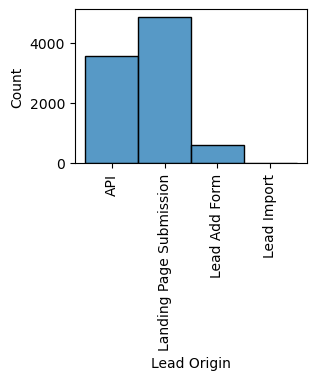

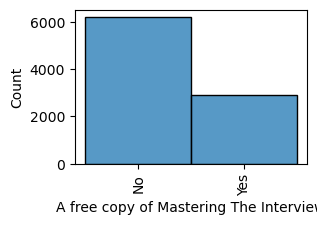

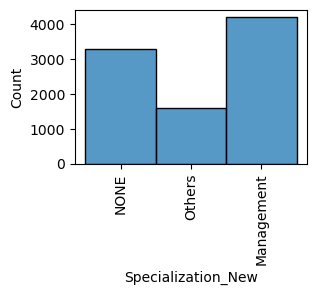

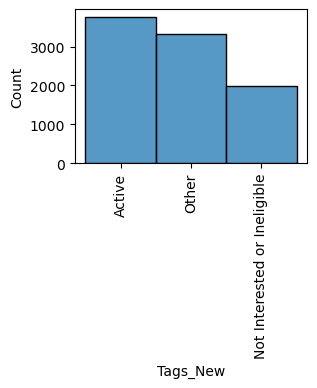

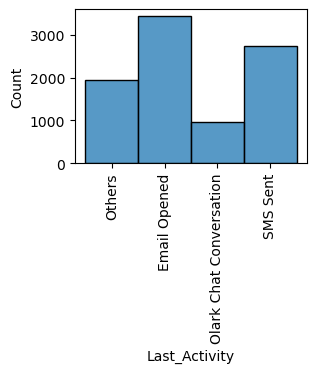

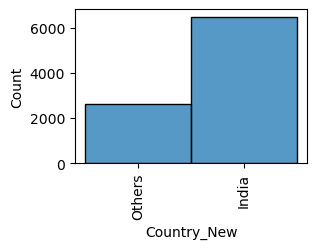

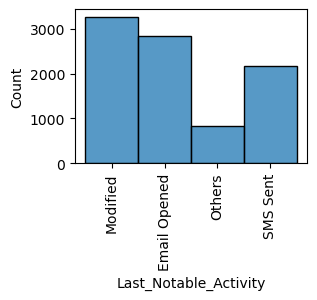

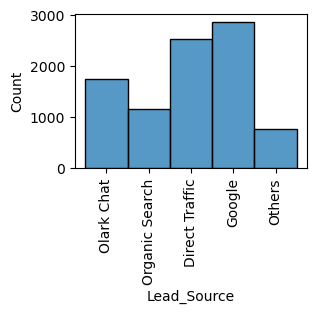

In [80]:
for i in cat_cols:
    plt.figure(figsize=(3,2)) 
    plt.xticks(rotation = 90)
    sns.histplot(x=Leads_New[i])
    plt.show()

**I have done some refining of analysis for organized and comprehensive view**

- **Specialization**: Is updated to "Specialization_New," grouping all management-related specializations together. This group tends to show the most interest in online education, followed by individuals without a specified specialization, possibly freshers.
- **Tags**: Is updated to "Tags_New," where leads expressing interest based on tag messages are classified as "Active," ranking highest. The least active category includes leads who are uncertain, and the lowest category comprises leads deemed ineligible or lost to others.
- **Last Activity**: Updated to Last_Activity, leads who opened emails are at the top, followed by those who received SMS messages.
- **What is your current occupation**: Leads showing more interest in online studies are primarily unemployed, followed by working professionals.
- The majority of leads are from India. 
- **Last_Notable_Activity**: column, activities are most often marked as "Modified," followed by "Email Opened" and "SMS Sent."
- **Lead_Source**: reveals that most leads come from Google search, followed by direct traffic, Olark Chat, and organic search.

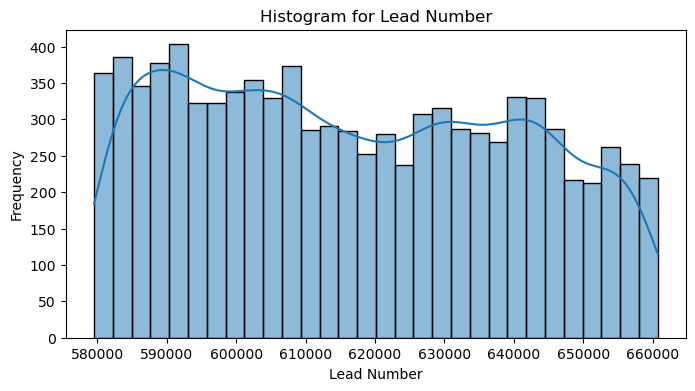

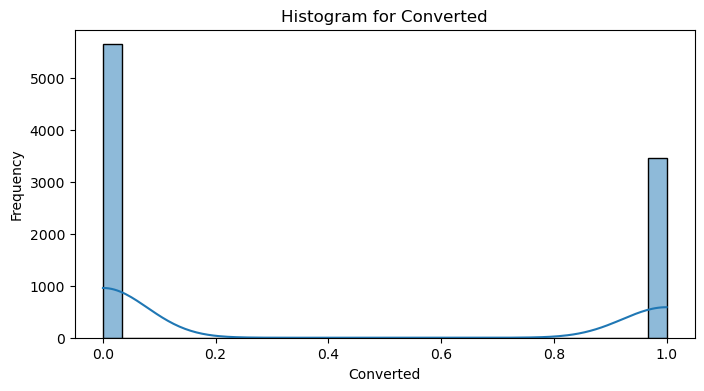

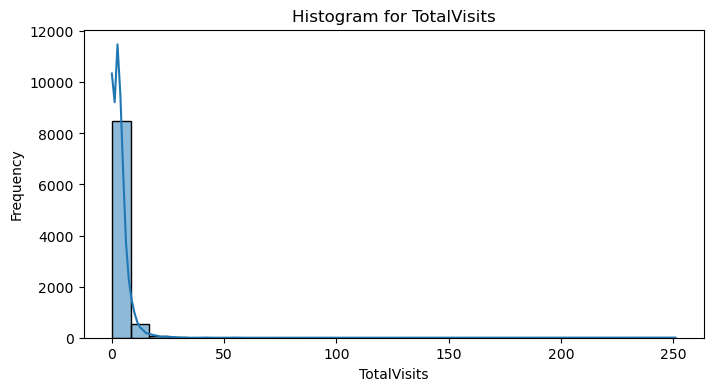

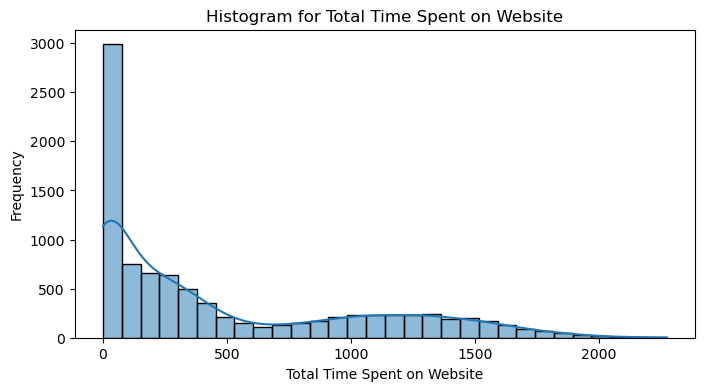

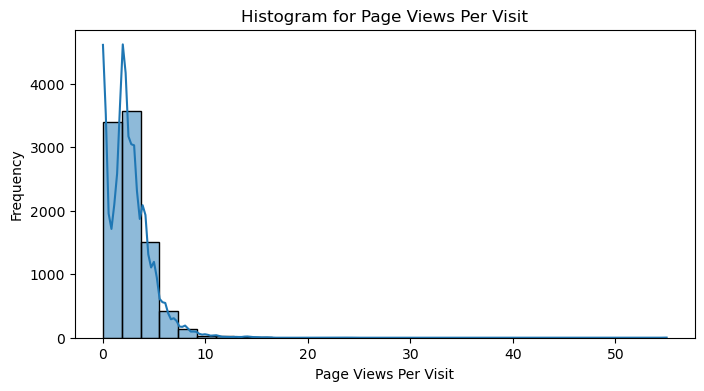

In [81]:
for i in cont_cols:
    np.random.seed(42)
    plt.figure(figsize=(8, 4))  
    sns.histplot(x=Leads_New[i], bins=30, kde=True) 
    plt.title(f'Histogram for {i}')
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.show()

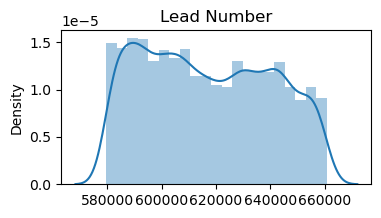

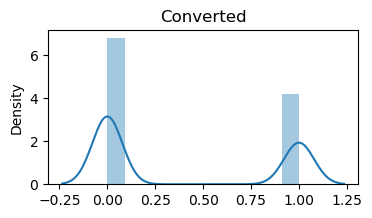

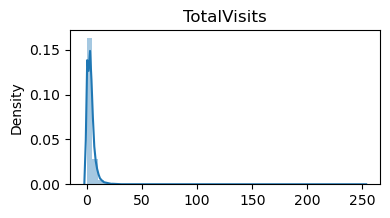

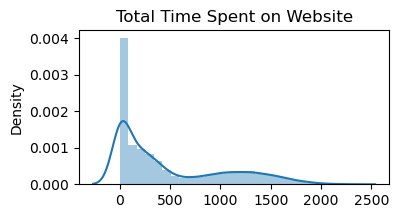

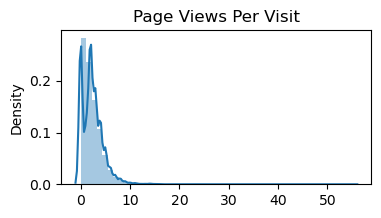

In [82]:
for i in cont_cols:
    plt.figure(figsize=(4,2)) 
    plt.title(i)
    sns.distplot(x=Leads_New[i])
    plt.show()


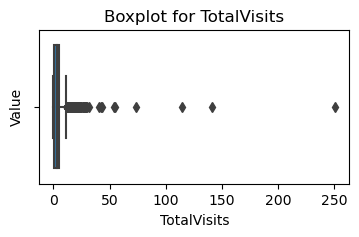

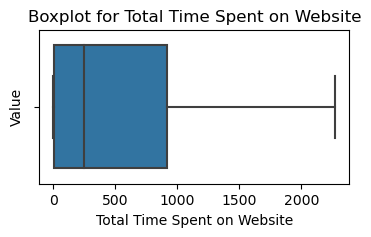

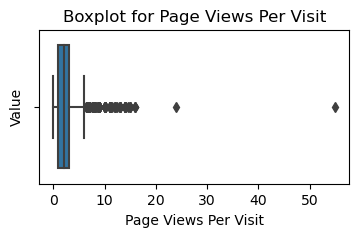

In [83]:
for i in ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']:
    plt.figure(figsize=(4,2)) 
    sns.boxplot(x=Leads_New[i])
    plt.title(f'Boxplot for {i}')
    plt.xlabel(i)
    plt.ylabel('Value')
    plt.show()

In [84]:
Leads_New.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000
mean,617027.742612,0.380204,3.445238,481.350104,2.362820
std,23337.138926,0.485464,4.854853,545.066142,2.161418
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596408.000000,0.000000,1.000000,9.000000,1.000000
50%,615278.000000,0.000000,3.000000,244.000000,2.000000
75%,637166.000000,1.000000,5.000000,919.500000,3.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


**Working on Outliers**

In [85]:
outliers_percentage={}

for feature in cont_cols.columns:
    IQR=cont_cols[feature].quantile(.75)-cont_cols[feature].quantile(.25)
    outliers_count=cont_cols[(cont_cols[feature]>(cont_cols[feature].quantile(.75)+1.5*IQR)) | (cont_cols[feature]<(cont_cols[feature].quantile(.25)-1.5*IQR))].shape[0]
    outliers_percentage[feature]=round(outliers_count/cont_cols.shape[0]*100,2)
    
outlier_df=pd.DataFrame({'Features':list(outliers_percentage.keys()),'Percentage':list(outliers_percentage.values())})
outlier_df.sort_values(by="Percentage", ascending=False)

,Features,Percentage
4,Page Views Per Visit,3.95
2,TotalVisits,2.93
0,Lead Number,0.00
1,Converted,0.00
3,Total Time Spent on Website,0.00


**Comment:**
- TotalVisits and Page Vies Per Visit  have outliers
- Hence reassigning fixed minimum and maximum values to those rows where feature value is outside the range of **[25th percentile - 1.5 * IQR, 75th percentile + 1.5 * IQR]**
- IQR or Inter Quartile Range = Difference between 75th percentile and 25th percentile values of a feature.

In [86]:
quantiles_to_check = [0.3, 0.5, 0.75, 0.90, 0.95, 0.99]

In [87]:
quantile_values = Leads_New['Page Views Per Visit'].quantile(quantiles_to_check)

for q, value in zip(quantiles_to_check, quantile_values):
    print(f'Quantile {q}: {value}')

Quantile 0.3: 1.0
Quantile 0.5: 2.0
Quantile 0.75: 3.0
Quantile 0.9: 5.0
Quantile 0.95: 6.0
Quantile 0.99: 9.0


In [88]:
Q1 = Leads_New['Page Views Per Visit'].quantile(0.25)
Q3 = Leads_New['Page Views Per Visit'].quantile(0.75)
IQR = Q3 - Q1
outliers = ((Leads_New['Page Views Per Visit'] < Q1 - 1.5 * IQR) | (Leads_New['Page Views Per Visit'] > Q3 + 1.5 * IQR))
outliers.value_counts()

False    8743
True      360
Name: Page Views Per Visit, dtype: int64

In [89]:
Leads_New['Page_Views_Per_Visit'] = Leads_New['Page Views Per Visit'][~((Leads_New['Page Views Per Visit'] < (Leads_New['Page Views Per Visit'].quantile(0.25)- 1.5 * (Leads_New['Page Views Per Visit'].quantile(0.75)-Leads_New['Page Views Per Visit'].quantile(0.25)))) |(Leads_New['Page Views Per Visit'] > (Leads_New['Page Views Per Visit'].quantile(0.75) + 1.5 * (Leads_New['Page Views Per Visit'].quantile(0.75)-Leads_New['Page Views Per Visit'].quantile(0.25)))))]
Leads_New['Page_Views_Per_Visit']

0       0.00
1       2.50
2       2.00
3       1.00
4       1.00
        ... 
9235    2.67
9236    2.00
9237    2.00
9238    3.00
9239    3.00
Name: Page_Views_Per_Visit, Length: 9103, dtype: float64

In [90]:
Leads_New = Leads_New[~Leads_New['Page_Views_Per_Visit'].isnull()]  # Remove rows with null values

In [91]:
Q1 = Leads_New['TotalVisits'].quantile(0.25)
Q3 = Leads_New['TotalVisits'].quantile(0.75)
IQR = Q3 - Q1
outliers1 = ((Leads_New['TotalVisits'] < Q1 - 1.5 * IQR) | (Leads_New['TotalVisits'] > Q3 + 1.5 * IQR))
outliers1.value_counts()

False    8474
True      269
Name: TotalVisits, dtype: int64

In [92]:
Leads_New['Total_Visits'] = Leads_New['TotalVisits'][~((Leads_New['TotalVisits'] < (Leads_New['TotalVisits'].quantile(0.25) - 1.5 * (Leads_New['TotalVisits'].quantile(0.75)-Leads_New['TotalVisits'].quantile(0.25)))) |(Leads_New['TotalVisits'] > (Leads_New['TotalVisits'].quantile(0.75) + 1.5 * (Leads_New['TotalVisits'].quantile(0.75)-Leads_New['TotalVisits'].quantile(0.25)))))]
Leads_New['Total_Visits']

0       0.0
1       5.0
2       2.0
3       1.0
4       2.0
       ... 
9235    8.0
9236    2.0
9237    2.0
9238    3.0
9239    6.0
Name: Total_Visits, Length: 8743, dtype: float64

In [93]:
Leads_New = Leads_New[~Leads_New['Total_Visits'].isnull()]  # Remove rows with null values

In [94]:
quantile_values = Leads_New['Total Time Spent on Website'].quantile(quantiles_to_check)

for q, value in zip(quantiles_to_check, quantile_values):
    print(f'Quantile {q}: {value}')

Quantile 0.3: 37.0
Quantile 0.5: 231.0
Quantile 0.75: 884.0
Quantile 0.9: 1361.0
Quantile 0.95: 1547.3499999999995
Quantile 0.99: 1826.0


In [95]:
Q1 = Leads_New['Total Time Spent on Website'].quantile(0.25)
Q3 = Leads_New['Total Time Spent on Website'].quantile(0.75)
IQR = Q3 - Q1
outliers2 = ((Leads_New['Total Time Spent on Website'] < Q1 - 1.5 * IQR) | (Leads_New['Total Time Spent on Website'] > Q3 + 1.5 * IQR))
outliers2.value_counts()

False    8471
True        3
Name: Total Time Spent on Website, dtype: int64

In [96]:
Leads_New = Leads_New[~Leads_New['Total Time Spent on Website'].isnull()]  # Remove rows with null values

In [97]:
Leads_New.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Page_Views_Per_Visit,Total_Visits
count,8474.000000,8474.000000,8474.000000,8474.000000,8474.000000,8474.000000,8474.000000
mean,616994.900283,0.376564,2.744985,466.969554,2.065103,2.065103,2.744985
std,23277.608086,0.484553,2.331743,541.462149,1.650505,1.650505,2.331743
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,596380.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,615470.500000,0.000000,2.000000,231.000000,2.000000,2.000000,2.000000
75%,637042.750000,1.000000,4.000000,884.000000,3.000000,3.000000,4.000000
max,660737.000000,1.000000,10.000000,2272.000000,6.000000,6.000000,10.000000


In [98]:
Leads_New=Leads_New.drop(columns=['TotalVisits','Page Views Per Visit'])

In [99]:
print("Rows:",Leads_New.shape[0], "Columns:",Leads_New.shape[1])

Rows: 8474 Columns: 14


In [100]:
(len(Leads_New.index)/9240)*100

91.70995670995671

In [101]:
Leads_New.describe()

,Lead Number,Converted,Total Time Spent on Website,Page_Views_Per_Visit,Total_Visits
count,8474.000000,8474.000000,8474.000000,8474.000000,8474.000000
mean,616994.900283,0.376564,466.969554,2.065103,2.744985
std,23277.608086,0.484553,541.462149,1.650505,2.331743
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596380.750000,0.000000,0.000000,0.000000,0.000000
50%,615470.500000,0.000000,231.000000,2.000000,2.000000
75%,637042.750000,1.000000,884.000000,3.000000,4.000000
max,660737.000000,1.000000,2272.000000,6.000000,10.000000


In [102]:
Leads_New.isnull().sum()

Lead Number                               0
Lead Origin                               0
Converted                                 0
Total Time Spent on Website               0
What is your current occupation           0
A free copy of Mastering The Interview    0
Specialization_New                        0
Tags_New                                  0
Last_Activity                             0
Country_New                               0
Last_Notable_Activity                     0
Lead_Source                               0
Page_Views_Per_Visit                      0
Total_Visits                              0
dtype: int64

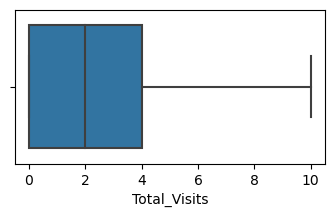

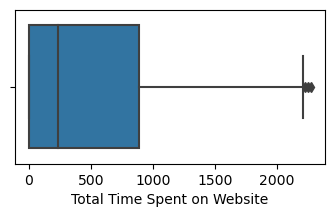

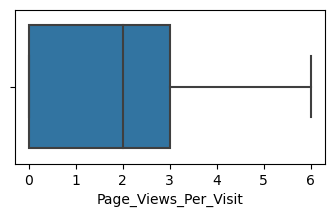

In [103]:
for i in ['Total_Visits','Total Time Spent on Website','Page_Views_Per_Visit']:
    plt.figure(figsize=(4,2)) 
    sns.boxplot(x=Leads_New[i])
    plt.show()

# Bivariate Analysis

Let's now visualise our data by making few plots of all the variables present to visualise which variables are most correlated to `Converted`.

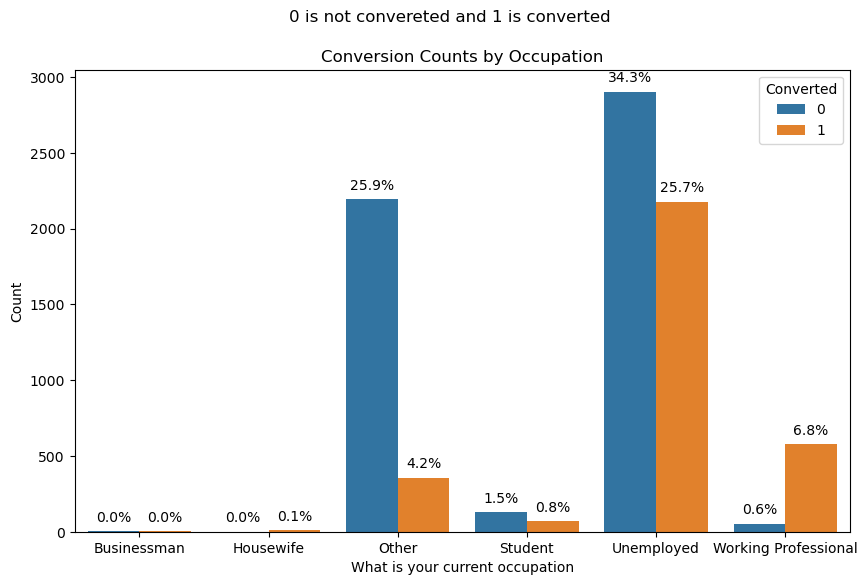

In [104]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="What is your current occupation", hue="Converted", data=Leads_New)
total = len(Leads_New)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total:.1%}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Conversion Counts by Occupation')
plt.xlabel('What is your current occupation')
plt.ylabel('Count')
plt.suptitle('0 is not convereted and 1 is converted')
plt.show()

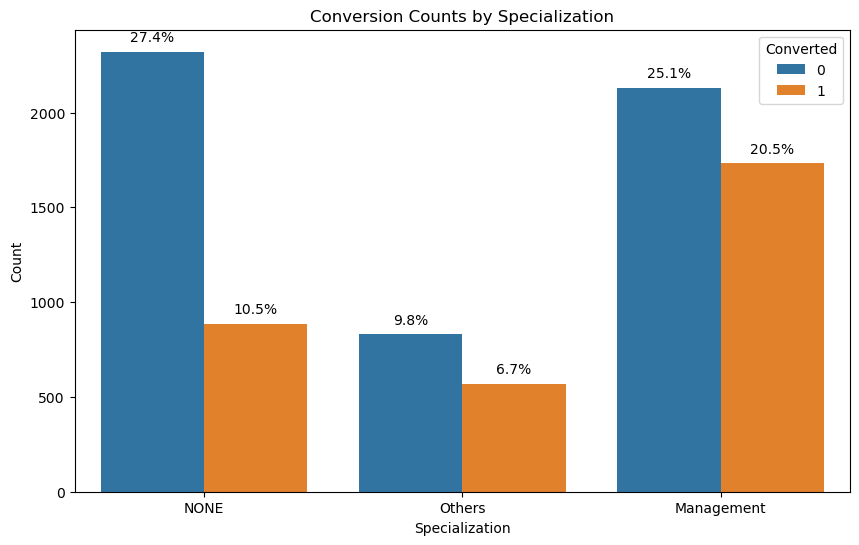

In [105]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="Specialization_New", hue="Converted", data=Leads_New)
total = len(Leads_New)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total:.1%}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Conversion Counts by Specialization')
plt.xlabel('Specialization')
plt.ylabel('Count')
plt.show()

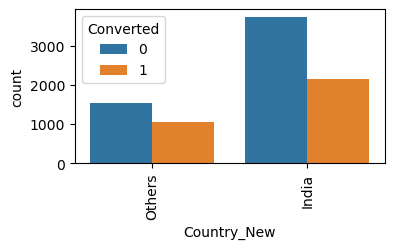

In [106]:
plt.figure(figsize=(4,2))
sns.countplot(x = "Country_New", hue = "Converted", data = Leads_New)
plt.xticks(rotation = 90)
plt.show()

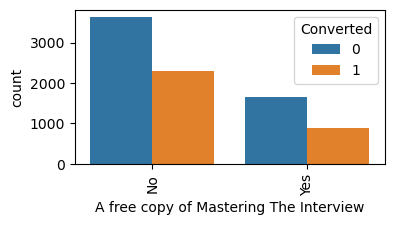

In [107]:
plt.figure(figsize=(4,2))
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = Leads_New)
plt.xticks(rotation = 90)
plt.show()

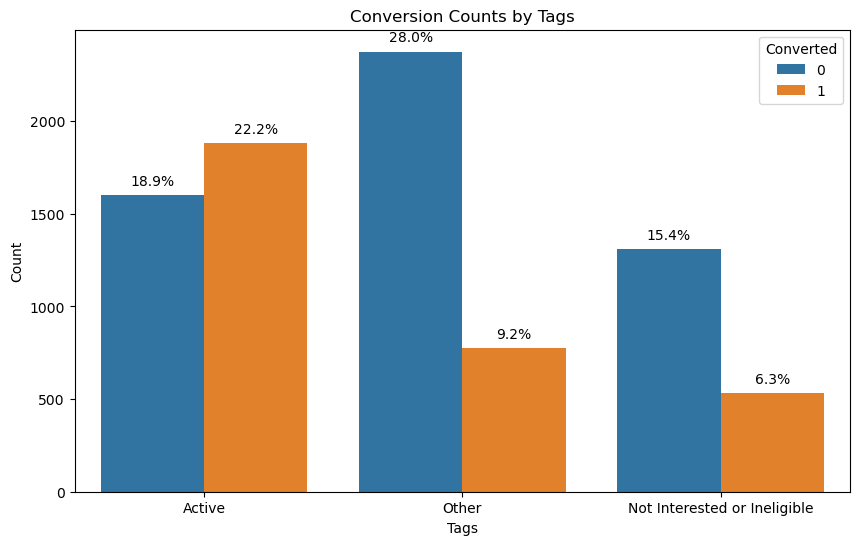

In [108]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="Tags_New", hue="Converted", data=Leads_New)
total = len(Leads_New)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total:.1%}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Conversion Counts by Tags')
plt.xlabel('Tags')
plt.ylabel('Count')
plt.show()

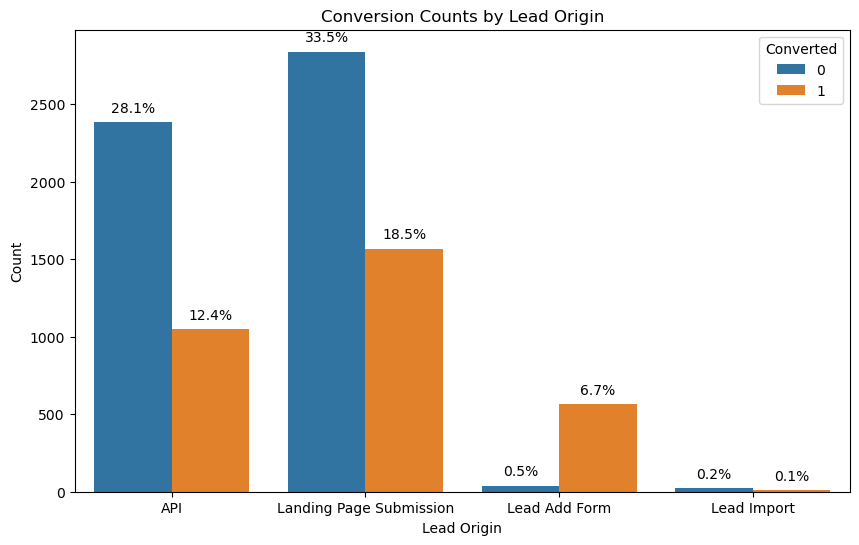

In [109]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="Lead Origin", hue="Converted", data=Leads_New)
total = len(Leads_New)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total:.1%}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Conversion Counts by Lead Origin')
plt.xlabel('Lead Origin')
plt.ylabel('Count')
plt.show()

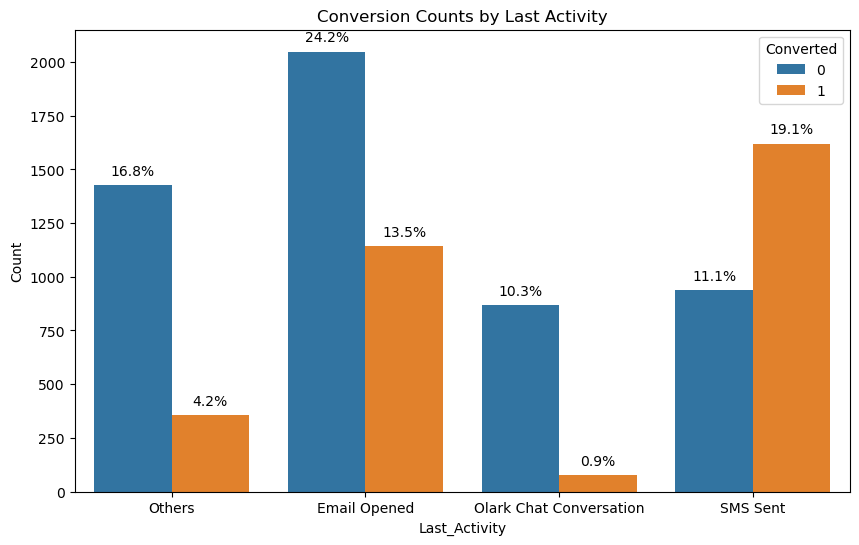

In [110]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="Last_Activity", hue="Converted", data=Leads_New)
total = len(Leads_New)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total:.1%}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Conversion Counts by Last Activity')
plt.xlabel('Last_Activity')
plt.ylabel('Count')
plt.show()

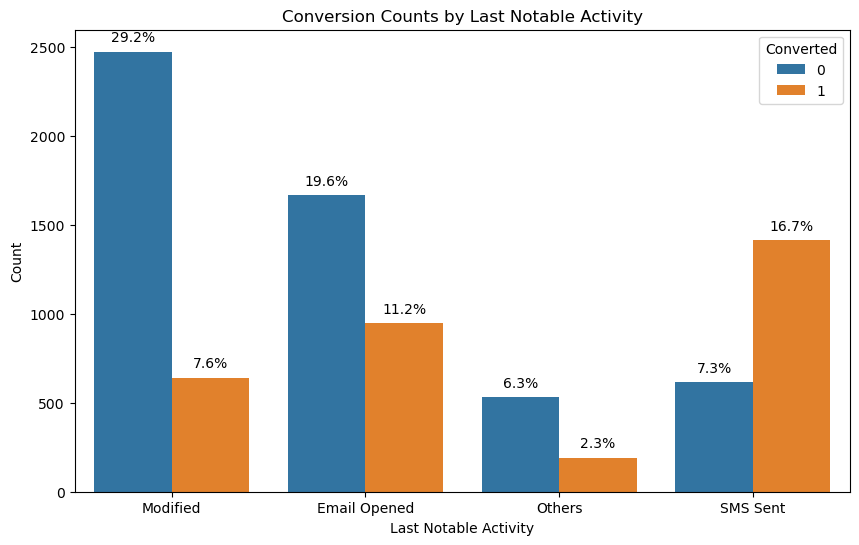

In [111]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="Last_Notable_Activity", hue="Converted", data=Leads_New)
total = len(Leads_New)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total:.1%}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Conversion Counts by Last Notable Activity')
plt.xlabel('Last Notable Activity')
plt.ylabel('Count')
plt.show()

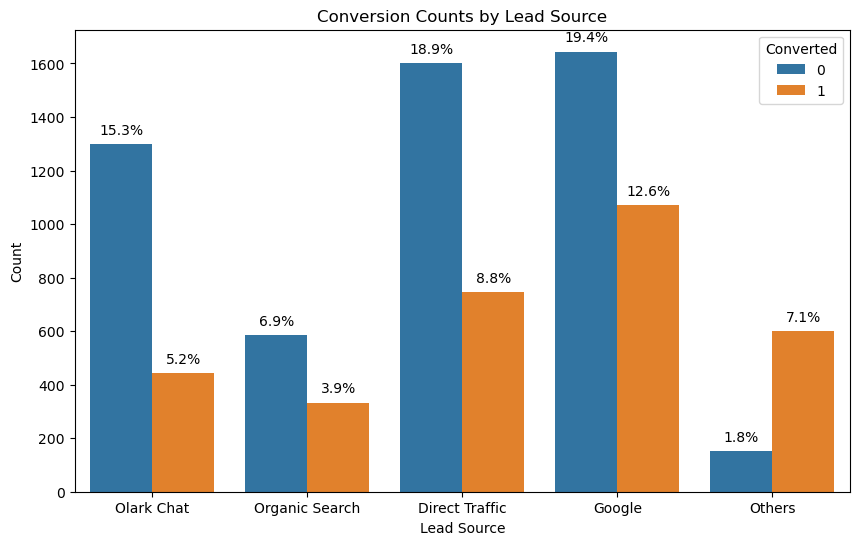

In [112]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="Lead_Source", hue="Converted", data=Leads_New)
total = len(Leads_New)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total:.1%}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Conversion Counts by Lead Source')
plt.xlabel('Lead Source')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Converted', ylabel='Total_Visits'>

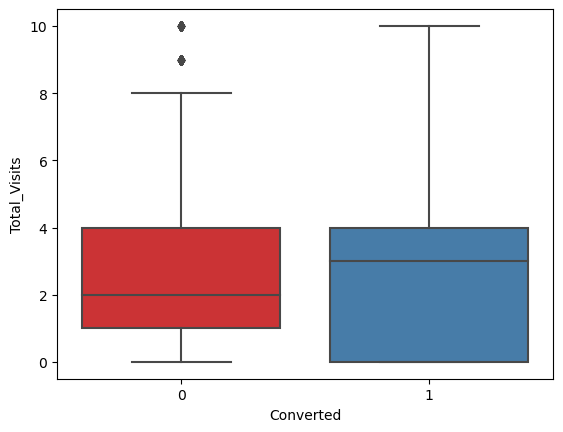

In [113]:
sns.boxplot(y = 'Total_Visits', x = 'Converted', data = Leads_New,palette='Set1')

<Axes: xlabel='Converted', ylabel='Total Time Spent on Website'>

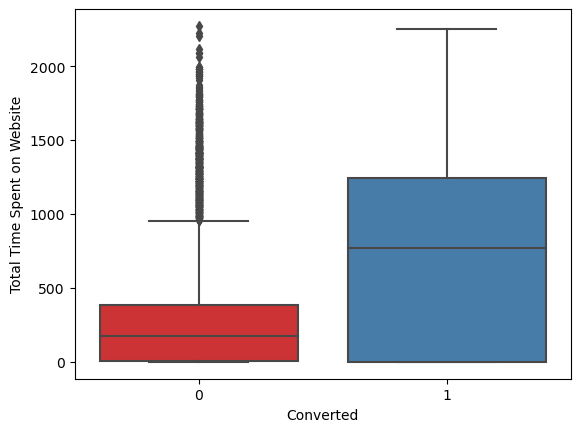

In [114]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = Leads_New,palette='Set1')

<Axes: xlabel='Converted', ylabel='Page_Views_Per_Visit'>

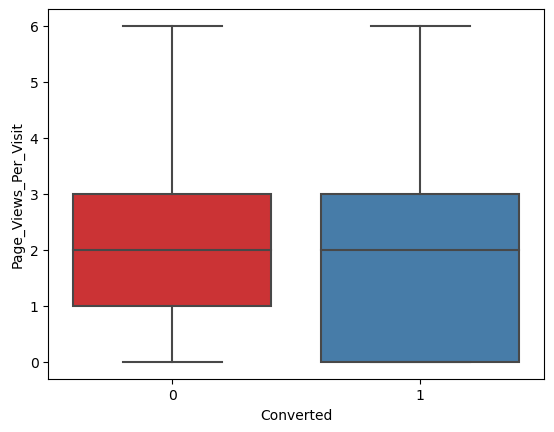

In [115]:
sns.boxplot(y = 'Page_Views_Per_Visit', x = 'Converted', data = Leads_New,palette='Set1')

# Multivariate Analysis

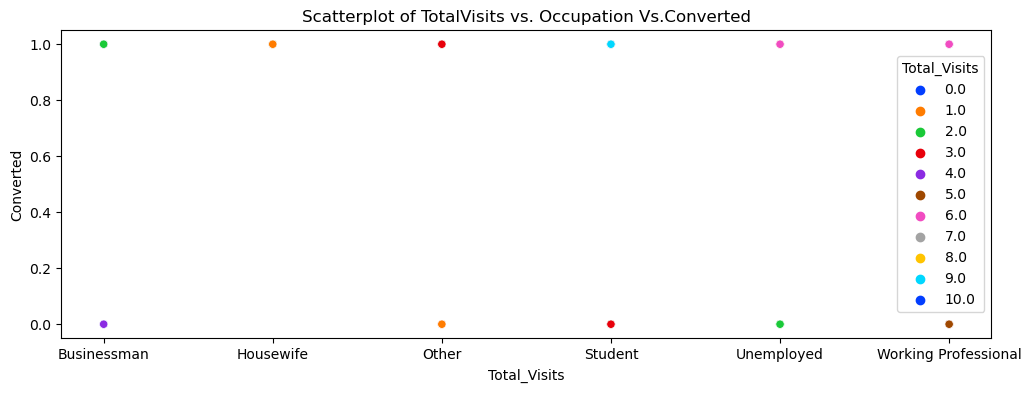

In [116]:
plt.figure(figsize=(12,4))
bright_palette = sns.color_palette("bright")
sns.scatterplot(data=Leads_New, x='What is your current occupation', y="Converted", hue='Total_Visits',palette=bright_palette)
plt.title('Scatterplot of TotalVisits vs. Occupation Vs.Converted')
plt.xlabel('Total_Visits',labelpad=5)
plt.ylabel('Converted')
plt.show()

**As per the above data**
- All Housewife are covereted Leads
- Students who did Total visits 10 or more have more chances of coverting to leads
- Businessman when approached in first two vists have more chances for coverting to leads
- Students whose vist is more that 9 have more chances of converting to leads
- Working Progessional and Unemployed whose vist is more that 6 have more chances of converting to leads

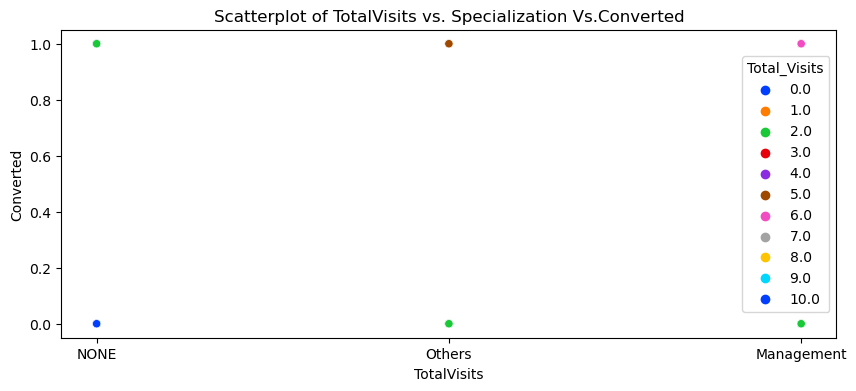

In [117]:
plt.figure(figsize=(10,4))
bright_palette = sns.color_palette("bright")
sns.scatterplot(data=Leads_New, x='Specialization_New', y="Converted", hue='Total_Visits',palette=bright_palette)
plt.title('Scatterplot of TotalVisits vs. Specialization Vs.Converted')
plt.xlabel('TotalVisits')
plt.ylabel('Converted')
plt.show()

**As per the above data**
- Leads who have not mentioned there Specialization who have Total Visits 2 are more tend to become hot leads
- Leads who have there specialization as Business Administration, Banking, Investment And Insurance, Travel and Tourism, Media and Advertising,International Business,E-COMMERCE etc who have Total Visits 5 are more tend to become hot leads 
- Leads who have there specialization as Finance Management,Human Resource Management,Marketing Management,Operations Management,IT Projects Management,Supply Chain Management,Healthcare Management,Hospitality Management,Retail Management who have Total Visits 6 are more tend to become hot leads 

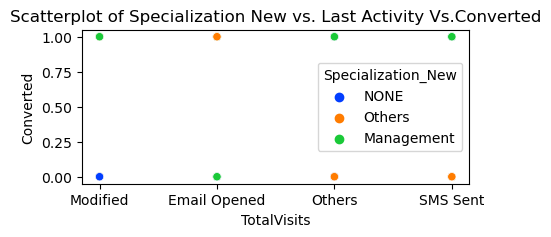

In [118]:
plt.figure(figsize=(5,2))
bright_palette = sns.color_palette("bright")
sns.scatterplot(data=Leads_New, x='Last_Notable_Activity', y="Converted", hue='Specialization_New',palette=bright_palette)
plt.title('Scatterplot of Specialization New vs. Last Activity Vs.Converted')
plt.xlabel('TotalVisits')
plt.ylabel('Converted')
plt.show()

<Figure size 500x200 with 0 Axes>

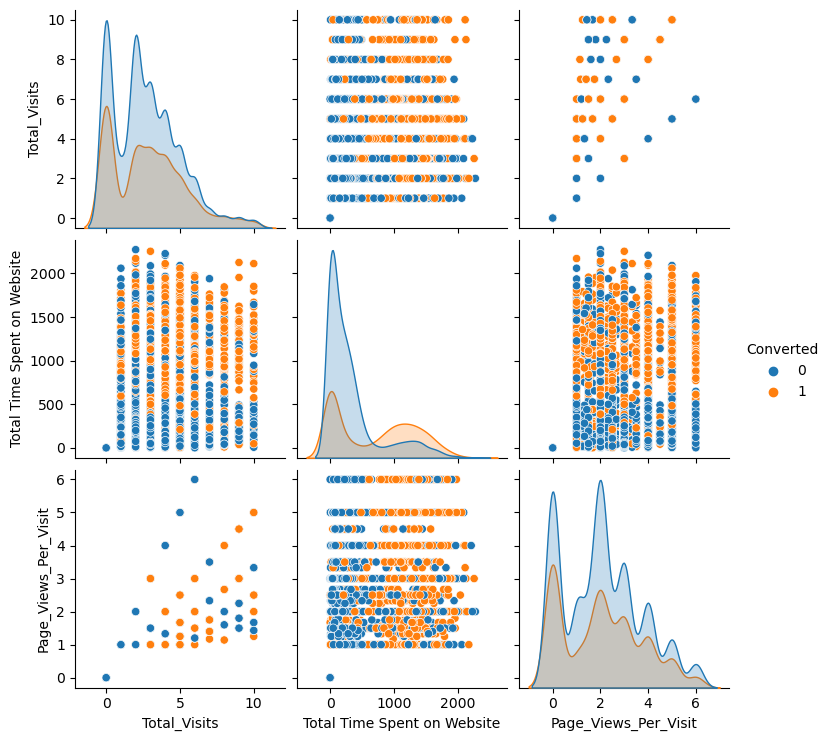

In [119]:
plt.figure(figsize=(5,2))
pairplot_cols = ['Total_Visits', 'Total Time Spent on Website', 'Page_Views_Per_Visit', 'Converted']
sns.pairplot(Leads_New[pairplot_cols], hue='Converted')
plt.show()

In [120]:
Leads_New.isnull().sum()

Lead Number                               0
Lead Origin                               0
Converted                                 0
Total Time Spent on Website               0
What is your current occupation           0
A free copy of Mastering The Interview    0
Specialization_New                        0
Tags_New                                  0
Last_Activity                             0
Country_New                               0
Last_Notable_Activity                     0
Lead_Source                               0
Page_Views_Per_Visit                      0
Total_Visits                              0
dtype: int64

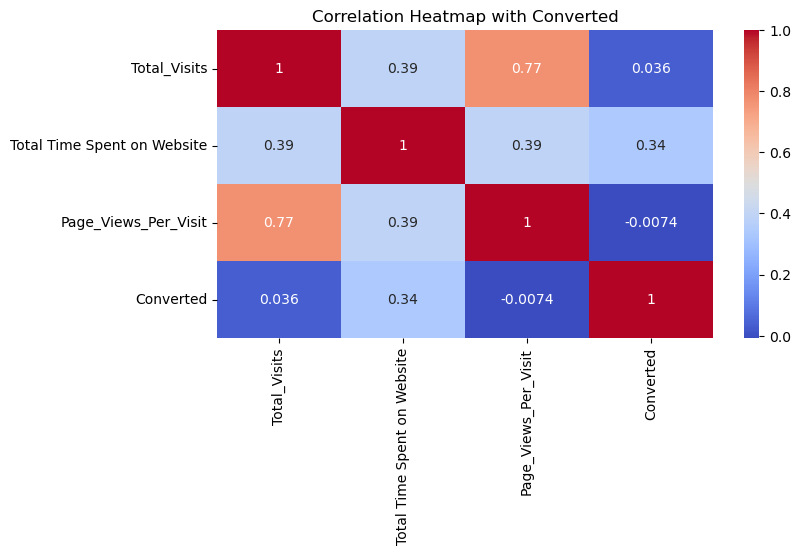

In [121]:
heatmap_cols = ['Total_Visits', 'Total Time Spent on Website', 'Page_Views_Per_Visit', 'Converted']

corr_df = Leads_New[heatmap_cols]

plt.figure(figsize=(8, 4))
sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm')

plt.title('Correlation Heatmap with Converted')
plt.show()


**Looking at the Heatmap TotalVisits and Total Time Spent on website have positive correlation with converted**

## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

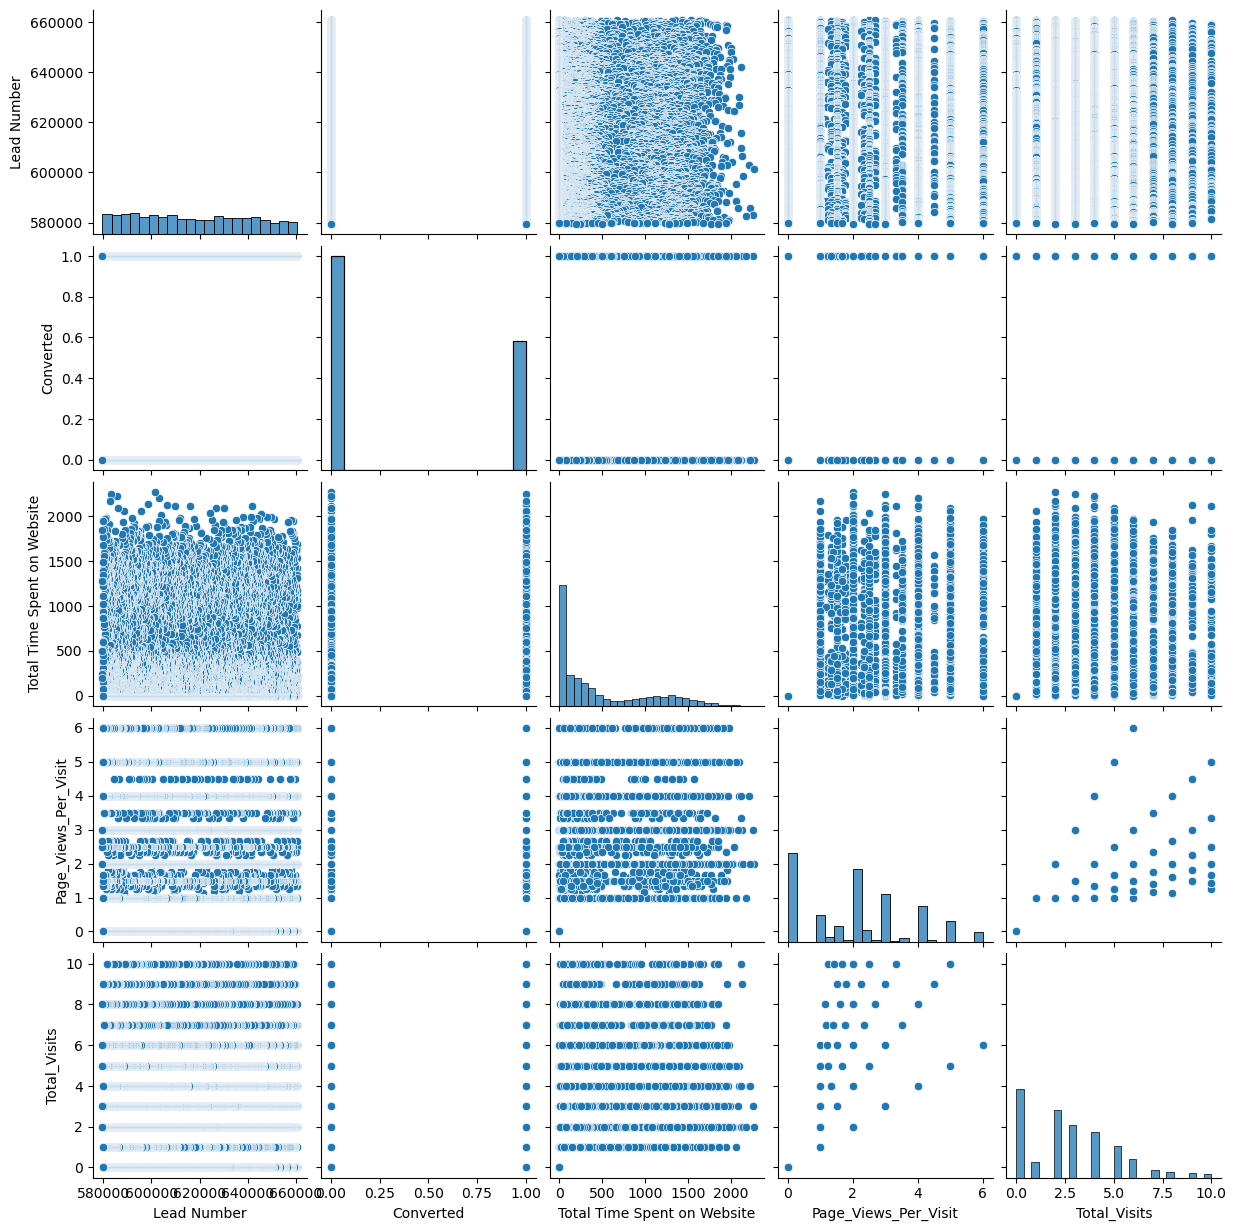

In [122]:
sns.pairplot(Leads_New)
plt.show()

In [123]:
Leads_New.corr()

,Lead Number,Converted,Total Time Spent on Website,Page_Views_Per_Visit,Total_Visits
Lead Number,1.000000,0.027578,0.023074,0.070690,0.059912
Converted,0.027578,1.000000,0.338312,-0.007444,0.035594
Total Time Spent on Website,0.023074,0.338312,1.000000,0.392309,0.391532
Page_Views_Per_Visit,0.070690,-0.007444,0.392309,1.000000,0.770158
Total_Visits,0.059912,0.035594,0.391532,0.770158,1.000000


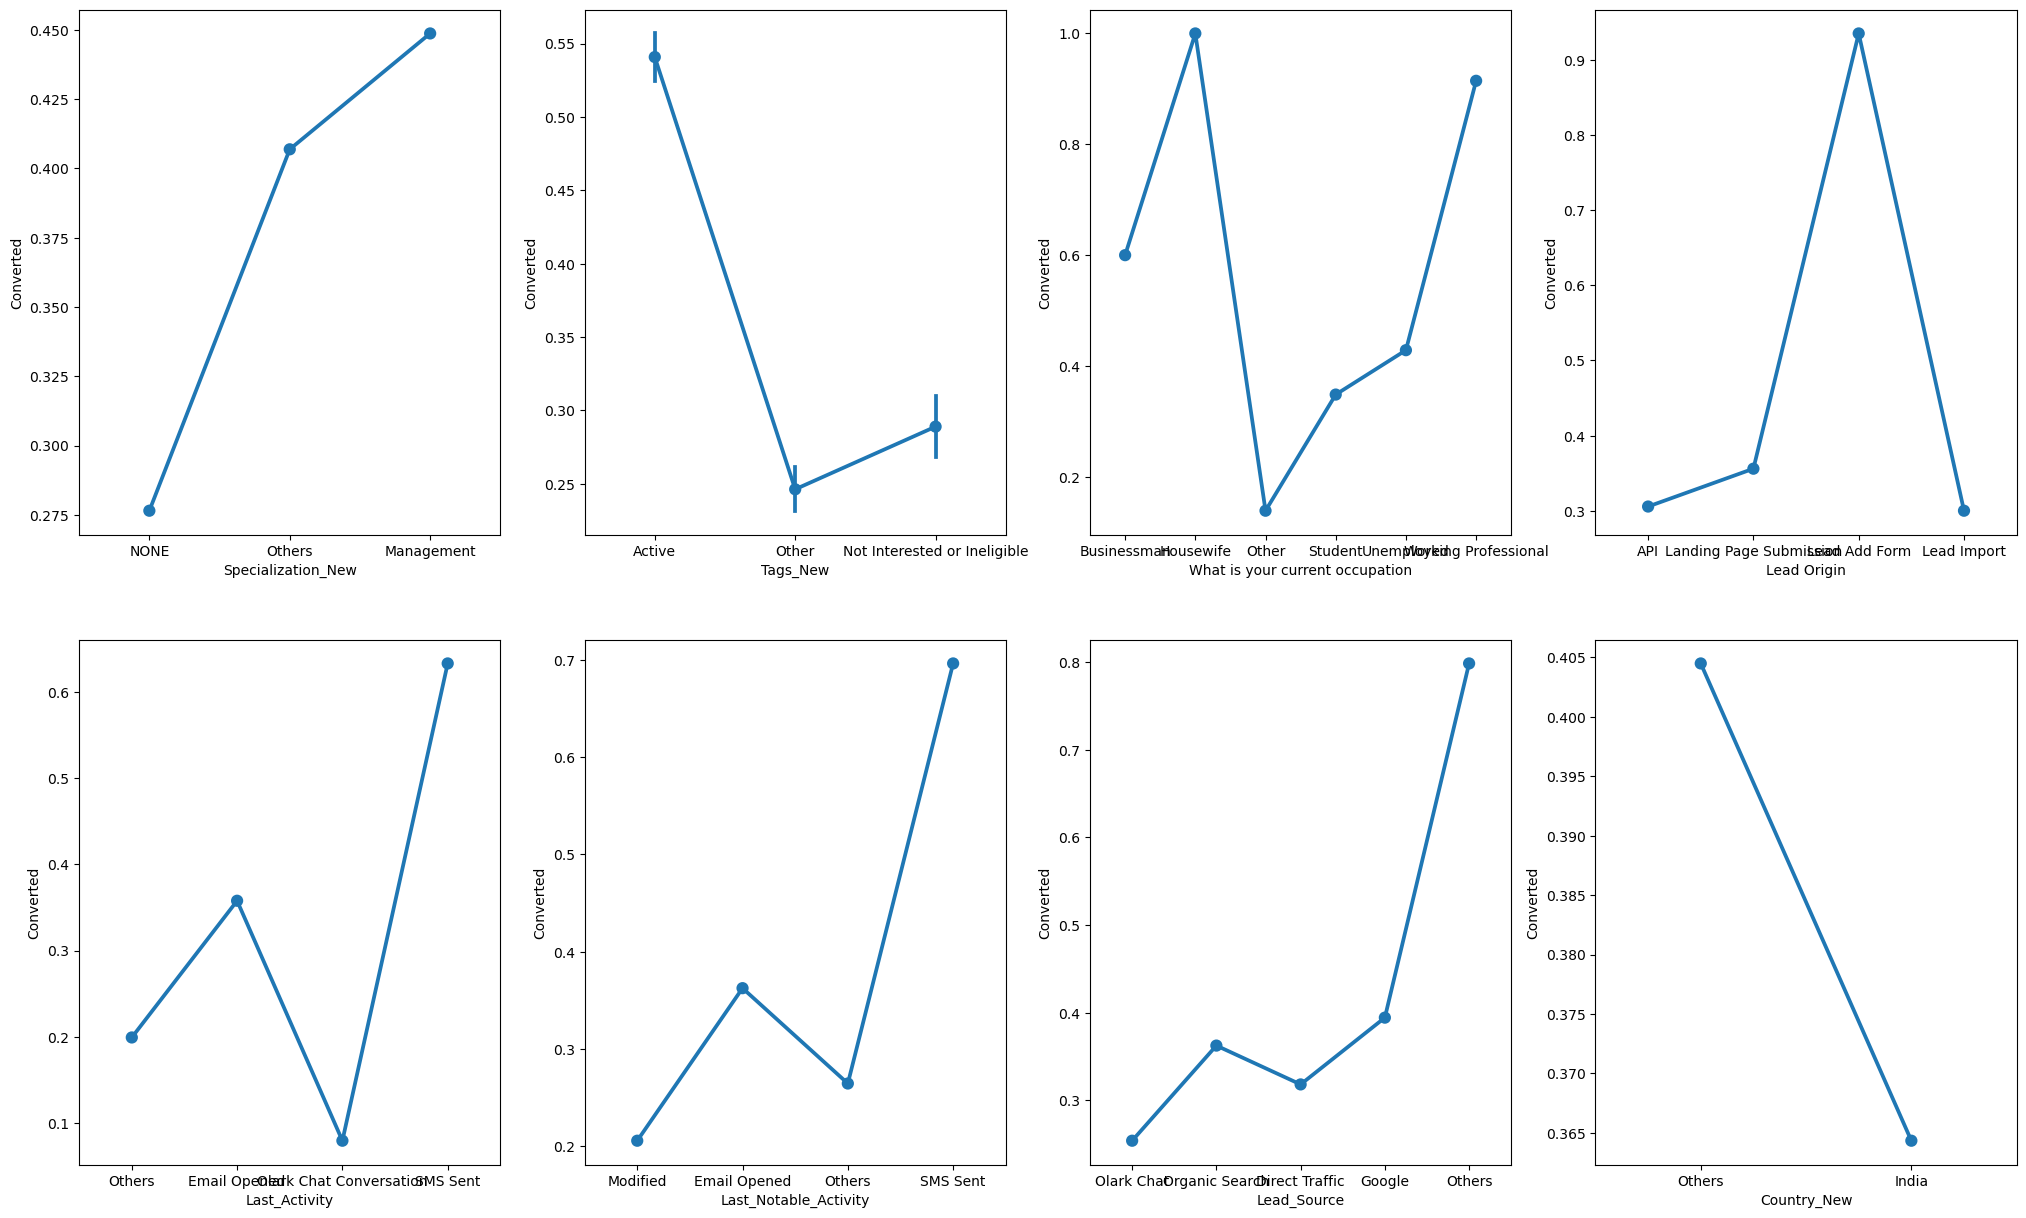

In [124]:
plt.figure(figsize=(25,15))
plt.xticks(rotation = 90)
plt.subplot(2,4,1)
sns.pointplot(x = 'Specialization_New', y = 'Converted', data = Leads_New, ci=None)
plt.subplot(2,4,2)
sns.pointplot(x = 'Tags_New', y = 'Converted', data = Leads_New)
plt.subplot(2,4,3)
sns.pointplot(x = 'What is your current occupation', y = 'Converted', data = Leads_New, ci=None)
plt.subplot(2,4,4)
sns.pointplot(x = 'Lead Origin', y = 'Converted', data = Leads_New, ci=None)
plt.subplot(2,4,5)
sns.pointplot(x = 'Last_Activity', y = 'Converted', data = Leads_New, ci=None)
plt.subplot(2,4,6)
sns.pointplot(x = 'Last_Notable_Activity', y = 'Converted', data = Leads_New, ci=None)
plt.subplot(2,4,7)
sns.pointplot(x = 'Lead_Source', y = 'Converted', data = Leads_New, ci=None)
plt.subplot(2,4,8)
sns.pointplot(x = 'Country_New', y = 'Converted', data = Leads_New, ci=None)
plt.show()

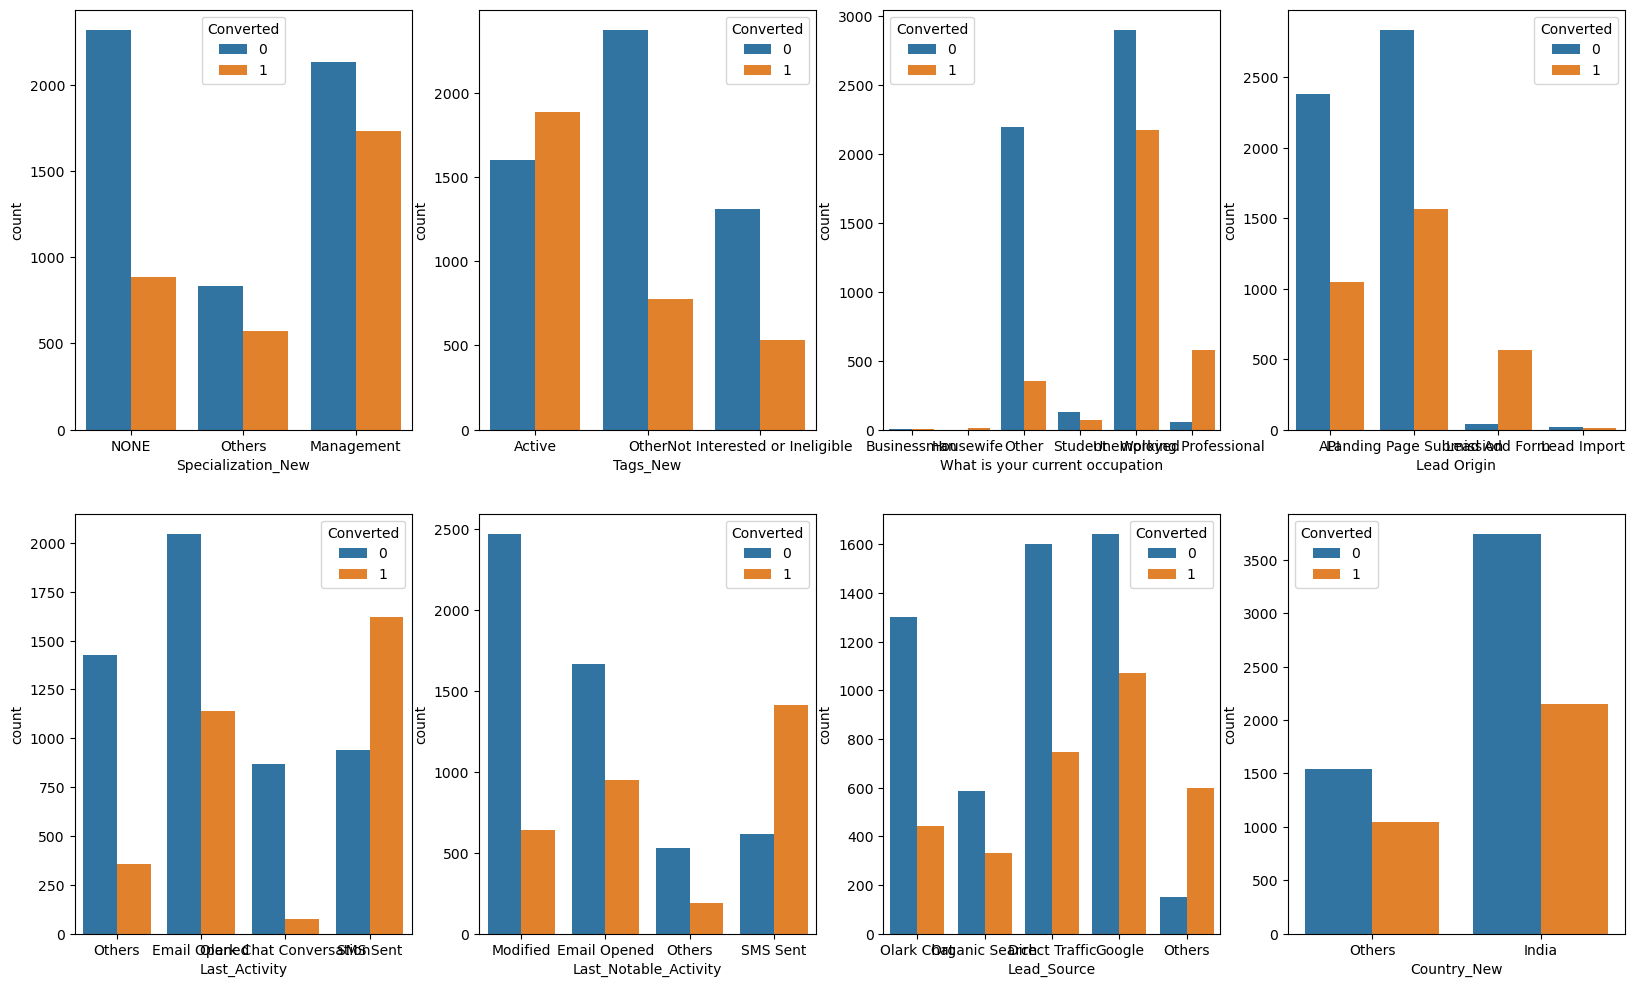

In [125]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.countplot(x='Specialization_New', hue='Converted', data=Leads_New)
plt.subplot(2,4,2)
sns.countplot(x = 'Tags_New', hue = 'Converted', data = Leads_New)
plt.subplot(2,4,3)
sns.countplot(x = 'What is your current occupation', hue = 'Converted', data = Leads_New)
plt.subplot(2,4,4)
sns.countplot(x = 'Lead Origin', hue = 'Converted', data = Leads_New)
plt.subplot(2,4,5)
sns.countplot(x = 'Last_Activity', hue = 'Converted', data = Leads_New)
plt.subplot(2,4,6)
sns.countplot(x = 'Last_Notable_Activity', hue = 'Converted', data = Leads_New)
plt.subplot(2,4,7)
sns.countplot(x = 'Lead_Source', hue = 'Converted', data = Leads_New)
plt.subplot(2,4,8)
sns.countplot(x = 'Country_New', hue = 'Converted', data = Leads_New)
plt.show()

**There is a positive correlation between TotalVisits and Total Time Spent on Website with Converted. Where Total Time Spent on Website are more likely to be converted. However for Page View Per Visit there is no dirrect correlation with Convereted.**

In [126]:
Leads_New[heatmap_cols].nunique()

Total_Visits                     11
Total Time Spent on Website    1675
Page_Views_Per_Visit             26
Converted                         2
dtype: int64

In [127]:
Leads_updated = Leads_New[['Lead Number','Converted','Total Time Spent on Website','What is your current occupation','Specialization_New','Tags_New','Last_Activity','Lead Origin','Last_Notable_Activity','Lead_Source','Page_Views_Per_Visit','Total_Visits']]

In [128]:
Leads_updated.nunique()

Lead Number                        8474
Converted                             2
Total Time Spent on Website        1675
What is your current occupation       6
Specialization_New                    3
Tags_New                              3
Last_Activity                         4
Lead Origin                           4
Last_Notable_Activity                 4
Lead_Source                           5
Page_Views_Per_Visit                 26
Total_Visits                         11
dtype: int64

# Pre-processing Steps

### Dummy variable creation (One Hot Encoding)

In [129]:
Leads_updated_dummies = pd.get_dummies(Leads_updated, drop_first=True)
Leads_updated_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8474 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Number                                           8474 non-null   int64  
 1   Converted                                             8474 non-null   int64  
 2   Total Time Spent on Website                           8474 non-null   int64  
 3   Page_Views_Per_Visit                                  8474 non-null   float64
 4   Total_Visits                                          8474 non-null   float64
 5   What is your current occupation_Housewife             8474 non-null   uint8  
 6   What is your current occupation_Other                 8474 non-null   uint8  
 7   What is your current occupation_Student               8474 non-null   uint8  
 8   What is your current occupation_Unemployed            8474

In [130]:
Leads_updated_dummies.shape

(8474, 27)

In [131]:
Leads_updated_dummies.describe()

,Lead Number,Converted,Total Time Spent on Website,Page_Views_Per_Visit,Total_Visits,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,...,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Last_Notable_Activity_Modified,Last_Notable_Activity_Others,Last_Notable_Activity_SMS Sent,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Others
count,8474.000000,8474.000000,8474.000000,8474.000000,8474.000000,8474.000000,8474.000000,8474.000000,8474.000000,8474.000000,...,8474.000000,8474.000000,8474.000000,8474.000000,8474.000000,8474.000000,8474.000000,8474.000000,8474.000000,8474.000000
mean,616994.900283,0.376564,466.969554,2.065103,2.744985,0.001062,0.300684,0.023366,0.599717,0.074581,...,0.520179,0.071159,0.003540,0.367123,0.085202,0.239438,0.320274,0.205570,0.108449,0.088506
std,23277.608086,0.484553,541.462149,1.650505,2.331743,0.032574,0.458583,0.151071,0.489985,0.262730,...,0.499622,0.257105,0.059398,0.482049,0.279198,0.426766,0.466609,0.404141,0.310965,0.284046
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,596380.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,615470.500000,0.000000,231.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,637042.750000,1.000000,884.000000,3.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,660737.000000,1.000000,2272.000000,6.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

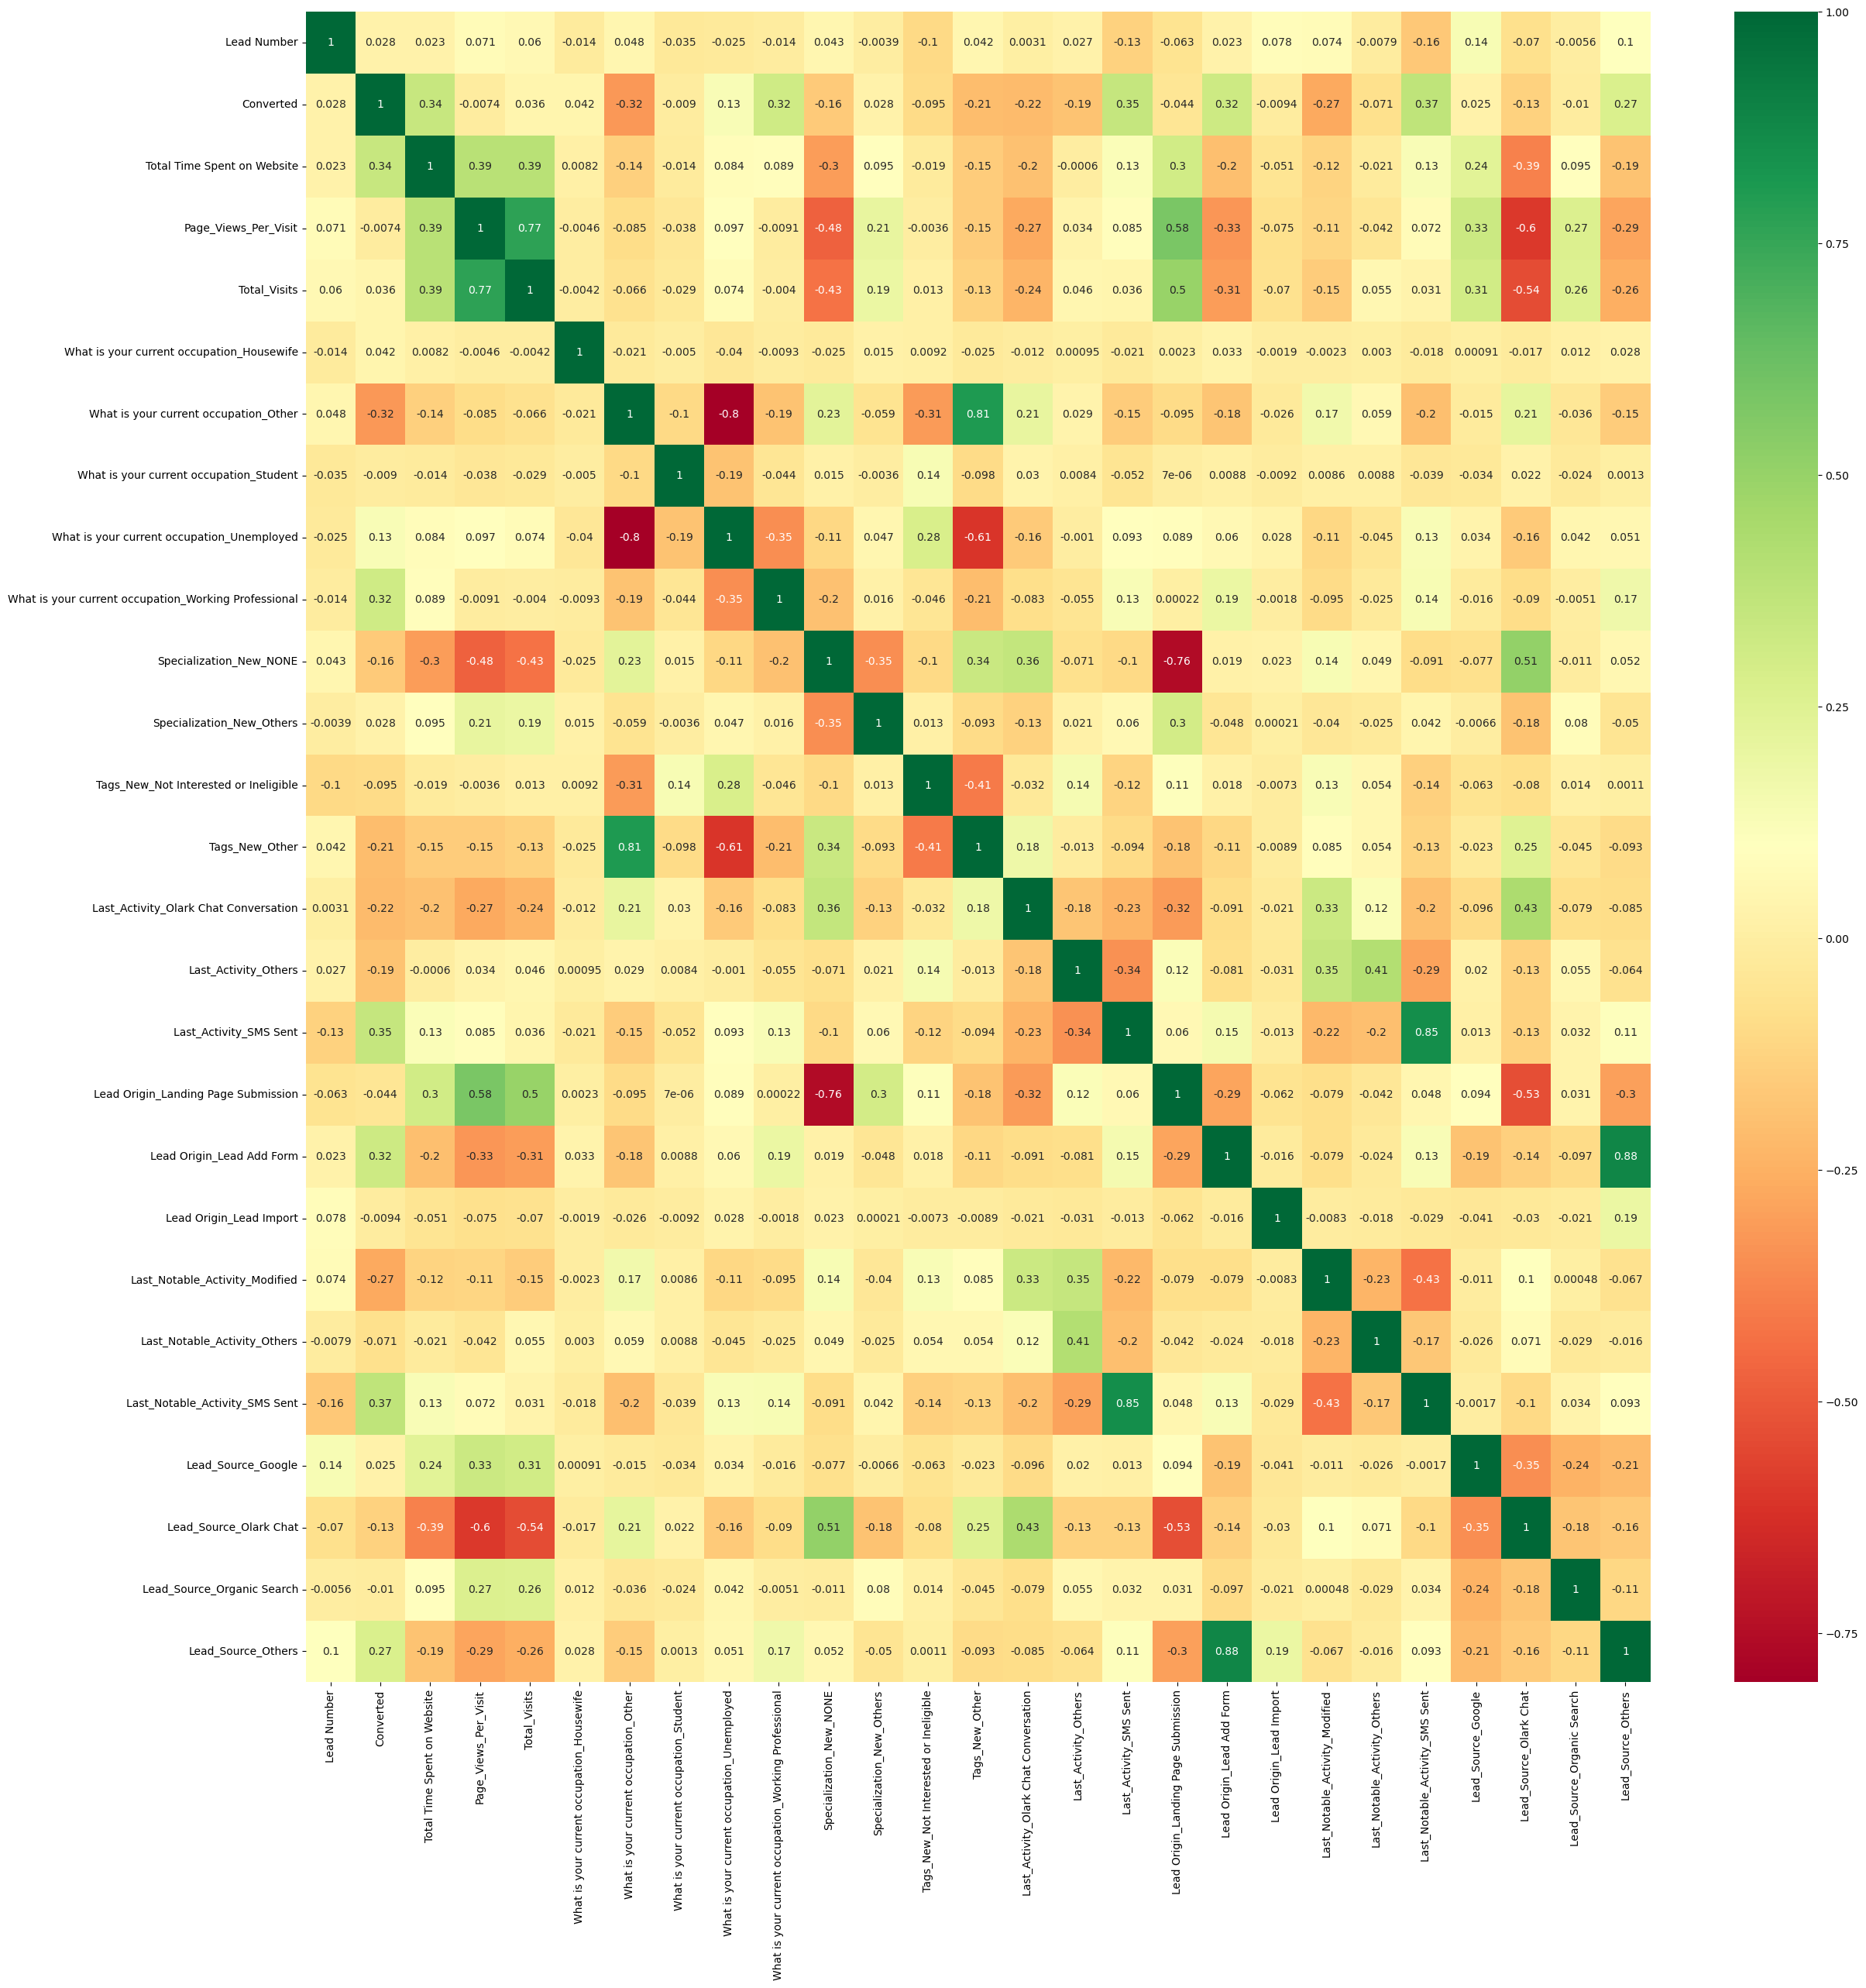

In [132]:
plt.figure(figsize=(28,28))
sns.heatmap(Leads_updated_dummies.corr(), annot=True, cmap="RdYlGn")
plt.show

Looking at the Heatmap below are the variables that contribute to Hot Leads

- Last Notable Activity SMS Sent
- What is your current occupation Working Professionals
- Total Time Spent on Website

In [133]:
HotLeads = Leads_updated_dummies.drop(['Lead Number'] , axis=1)
HotLeads.head()

,Converted,Total Time Spent on Website,Page_Views_Per_Visit,Total_Visits,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Specialization_New_NONE,...,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Last_Notable_Activity_Modified,Last_Notable_Activity_Others,Last_Notable_Activity_SMS Sent,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Others
0,0,0,0.0,0.0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,1,0,0
1,0,674,2.5,5.0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
2,1,1532,2.0,2.0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,305,1.0,1.0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
4,1,1428,1.0,2.0,0,0,0,1,0,1,...,1,0,0,1,0,0,1,0,0,0


In [134]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
num_vars_standardized = scaler.fit_transform(HotLeads)

### Train-Test Split

# **Steps:**
    
- create X and y
- create train and test sets (70-30,80-20)
- train your model on the training set (i.e, learn the coefficients)
- evaluate the model(training set,test set)

In [135]:
X = HotLeads.drop(['Converted'], axis=1)
X.head()

,Total Time Spent on Website,Page_Views_Per_Visit,Total_Visits,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Specialization_New_NONE,Specialization_New_Others,...,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Last_Notable_Activity_Modified,Last_Notable_Activity_Others,Last_Notable_Activity_SMS Sent,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Others
0,0,0.0,0.0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,1,0,0
1,674,2.5,5.0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,1532,2.0,2.0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3,305,1.0,1.0,0,0,0,1,0,0,1,...,1,0,0,1,0,0,0,0,0,0
4,1428,1.0,2.0,0,0,0,1,0,1,0,...,1,0,0,1,0,0,1,0,0,0


In [136]:
# Putting target variable to y
y = HotLeads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=999)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5931, 25)
(2543, 25)
(5931,)
(2543,)


### Scaling the features

In [138]:
X_train[['Total_Visits','Total Time Spent on Website','Page_Views_Per_Visit']] = scaler.fit_transform(X_train[['Total_Visits','Total Time Spent on Website','Page_Views_Per_Visit']])
X_train.head()

,Total Time Spent on Website,Page_Views_Per_Visit,Total_Visits,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Specialization_New_NONE,Specialization_New_Others,...,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Last_Notable_Activity_Modified,Last_Notable_Activity_Others,Last_Notable_Activity_SMS Sent,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Others
3689,-0.632017,-0.032196,-0.313751,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2361,-0.869366,-1.252871,-1.177058,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1
106,-0.639376,0.578141,2.707824,0,1,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
7495,-0.869366,-1.252871,-1.177058,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
8094,1.088309,-0.032196,-0.313751,0,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,1,0


In [139]:
# Check for infinite values in the training set
inf_check_train = X_train.replace([np.inf, -np.inf], np.nan).isnull().sum()

# Display the results
print("Infinite values in the training set:")
print(inf_check_train)

Infinite values in the training set:
Total Time Spent on Website                             0
Page_Views_Per_Visit                                    0
Total_Visits                                            0
What is your current occupation_Housewife               0
What is your current occupation_Other                   0
What is your current occupation_Student                 0
What is your current occupation_Unemployed              0
What is your current occupation_Working Professional    0
Specialization_New_NONE                                 0
Specialization_New_Others                               0
Tags_New_Not Interested or Ineligible                   0
Tags_New_Other                                          0
Last_Activity_Olark Chat Conversation                   0
Last_Activity_Others                                    0
Last_Activity_SMS Sent                                  0
Lead Origin_Landing Page Submission                     0
Lead Origin_Lead Add Form          

## Feature Selection Using RFE

In [140]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [141]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)
logreg = LogisticRegression(solver='liblinear')  

from sklearn.feature_selection import RFE
rfe = RFE(estimator=logreg, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

In [142]:
rfe.support_

array([ True,  True,  True,  True,  True, False, False,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True, False,  True])

In [143]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Total Time Spent on Website', True, 1),
 ('Page_Views_Per_Visit', True, 1),
 ('Total_Visits', True, 1),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Other', True, 1),
 ('What is your current occupation_Student', False, 3),
 ('What is your current occupation_Unemployed', False, 2),
 ('What is your current occupation_Working Professional', True, 1),
 ('Specialization_New_NONE', True, 1),
 ('Specialization_New_Others', False, 6),
 ('Tags_New_Not Interested or Ineligible', True, 1),
 ('Tags_New_Other', True, 1),
 ('Last_Activity_Olark Chat Conversation', True, 1),
 ('Last_Activity_Others', True, 1),
 ('Last_Activity_SMS Sent', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Last_Notable_Activity_Modified', False, 5),
 ('Last_Notable_Activity_Others', True, 1),
 ('Last_Notable_Activity_SMS Sent', True, 1),
 ('Lead_Source_Google', True, 1),
 ('Lead

In [144]:
# Viewing columns selected by RFE
model_col= X_train.columns[rfe.support_]
model_col

Index(['Total Time Spent on Website', 'Page_Views_Per_Visit', 'Total_Visits',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Working Professional',
       'Specialization_New_NONE', 'Tags_New_Not Interested or Ineligible',
       'Tags_New_Other', 'Last_Activity_Olark Chat Conversation',
       'Last_Activity_Others', 'Last_Activity_SMS Sent',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Last_Notable_Activity_Others',
       'Last_Notable_Activity_SMS Sent', 'Lead_Source_Google',
       'Lead_Source_Olark Chat', 'Lead_Source_Others'],
      dtype='object')

# Model Building

## Model-1

In [145]:
X_train_sm = sm.add_constant(X_train[model_col])
m1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = m1.fit(max_iter=100)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5910
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2318.4
Date:                Wed, 22 Nov 2023   Deviance:                       4636.8
Time:                        02:16:51   Pearson chi2:                 6.08e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4156
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3646      0.161     -2.271      0.023      -0.679      -0.050
Total Time Spent on Website                              1.0601      0.042     24.961      0.000       0.977       1.143
Page_Views_Per_Visit                                    -0.2537      0.064     -3.964      0.000      -0.379      -0.128
Total_Visits                                             0.2861      0.057      5.012      0.000       0.174       0.398
What is your current occupation_Housewife               22.3596   1.78e+04      0.001      0.999   -3.49e+04     3.5e+04
What is your current occupation_Other                   -1.7915      0.141    -12.745      0.000      -2.067      -1.516
What is your current occupation_Working Professional     2.2385      0.196     11.414      0.000       1.854       2.623
Specialization_New_NONE                                 -1.0920      0.138     -7.935      0.000      -1.362      -0.822
Tags_New_Not Interested or Ineligible                   -0.5842      0.098     -5.969      0.000      -0.776      -0.392
Tags_New_Other                                           0.7610      0.135      5.639      0.000       0.496       1.025
Last_Activity_Olark Chat Conversation                   -1.5241      0.185     -8.245      0.000      -1.886      -1.162
Last_Activity_Others                                    -0.7376      0.124     -5.941      0.000      -0.981      -0.494
Last_Activity_SMS Sent                                   0.2610      0.153      1.709      0.087      -0.038       0.560
Lead Origin_Landing Page Submission                     -0.7966      0.144     -5.541      0.000      -1.078      -0.515
Lead Origin_Lead Add Form                                3.8275      0.403      9.509      0.000       3.039       4.616
Lead Origin_Lead Import                                  0.6500      0.630      1.031      0.302      -0.586       1.886
Last_Notable_Activity_Others                             0.3681      0.167      2.198      0.028       0.040       0.696
Last_Notable_Activity_SMS Sent                           1.0942      0.159      6.878      0.000       0.782       1.406
Lead_Source_Google                                       0.3186      0.089      3.591      0.000       0.145       0.493
Lead_Source_Olark Chat                                   1.3223      0.165      7.995      0.000       0.998       1.646
Lead_Source_Others                                       0.3148      0.318      0.991      0.322      -0.308       0.937
========================================================================================================================
"""

**Pvalue of 'What is your current occupation_Housewife' is very high, so droping this column.**

In [146]:
model_col1 = model_col.drop('What is your current occupation_Housewife')

## Model-2

In [147]:
X_train_sm = sm.add_constant(X_train[model_col1])
m2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = m2.fit(max_iter=100)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5911
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2321.3
Date:                Wed, 22 Nov 2023   Deviance:                       4642.6
Time:                        02:16:51   Pearson chi2:                 6.08e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4150
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3616      0.160     -2.253      0.024      -0.676      -0.047
Total Time Spent on Website                              1.0603      0.042     24.971      0.000       0.977       1.144
Page_Views_Per_Visit                                    -0.2534      0.064     -3.960      0.000      -0.379      -0.128
Total_Visits                                             0.2834      0.057      4.967      0.000       0.172       0.395
What is your current occupation_Other                   -1.7922      0.141    -12.751      0.000      -2.068      -1.517
What is your current occupation_Working Professional     2.2356      0.196     11.400      0.000       1.851       2.620
Specialization_New_NONE                                 -1.0947      0.138     -7.958      0.000      -1.364      -0.825
Tags_New_Not Interested or Ineligible                   -0.5753      0.098     -5.889      0.000      -0.767      -0.384
Tags_New_Other                                           0.7617      0.135      5.645      0.000       0.497       1.026
Last_Activity_Olark Chat Conversation                   -1.5278      0.185     -8.265      0.000      -1.890      -1.165
Last_Activity_Others                                    -0.7445      0.124     -5.998      0.000      -0.988      -0.501
Last_Activity_SMS Sent                                   0.2553      0.153      1.672      0.095      -0.044       0.555
Lead Origin_Landing Page Submission                     -0.7947      0.144     -5.530      0.000      -1.076      -0.513
Lead Origin_Lead Add Form                                3.8319      0.402      9.523      0.000       3.043       4.621
Lead Origin_Lead Import                                  0.6440      0.630      1.022      0.307      -0.591       1.879
Last_Notable_Activity_Others                             0.3711      0.167      2.217      0.027       0.043       0.699
Last_Notable_Activity_SMS Sent                           1.0951      0.159      6.883      0.000       0.783       1.407
Lead_Source_Google                                       0.3205      0.089      3.615      0.000       0.147       0.494
Lead_Source_Olark Chat                                   1.3202      0.165      7.986      0.000       0.996       1.644
Lead_Source_Others                                       0.3163      0.318      0.996      0.319      -0.306       0.939
========================================================================================================================
"""

In [148]:
# Dropping the column 'Tags_New_Other' to reduce the variables
model_col1 = model_col1.drop('Lead_Source_Others')

### Checking for VIF values:

In [149]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[model_col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[model_col1].values, i) for i in range(X_train[model_col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Last_Activity_SMS Sent,5.62
7,Tags_New_Other,5.47
15,Last_Notable_Activity_SMS Sent,5.03
3,What is your current occupation_Other,4.46
1,Page_Views_Per_Visit,3.27
5,Specialization_New_NONE,3.15
11,Lead Origin_Landing Page Submission,3.01
17,Lead_Source_Olark Chat,3.00
2,Total_Visits,2.71
9,Last_Activity_Others,1.93


## Model-3

In [150]:
X_train_sm = sm.add_constant(X_train[model_col1])
m3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = m3.fit(max_iter=100)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5912
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2321.8
Date:                Wed, 22 Nov 2023   Deviance:                       4643.6
Time:                        02:16:52   Pearson chi2:                 6.07e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4149
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3387      0.159     -2.132      0.033      -0.650      -0.027
Total Time Spent on Website                              1.0591      0.042     24.964      0.000       0.976       1.142
Page_Views_Per_Visit                                    -0.2523      0.064     -3.942      0.000      -0.378      -0.127
Total_Visits                                             0.2856      0.057      5.006      0.000       0.174       0.397
What is your current occupation_Other                   -1.7910      0.141    -12.740      0.000      -2.067      -1.515
What is your current occupation_Working Professional     2.2320      0.196     11.392      0.000       1.848       2.616
Specialization_New_NONE                                 -1.0910      0.138     -7.929      0.000      -1.361      -0.821
Tags_New_Not Interested or Ineligible                   -0.5792      0.098     -5.936      0.000      -0.770      -0.388
Tags_New_Other                                           0.7604      0.135      5.634      0.000       0.496       1.025
Last_Activity_Olark Chat Conversation                   -1.5245      0.185     -8.252      0.000      -1.887      -1.162
Last_Activity_Others                                    -0.7423      0.124     -5.984      0.000      -0.985      -0.499
Last_Activity_SMS Sent                                   0.2521      0.153      1.652      0.099      -0.047       0.551
Lead Origin_Landing Page Submission                     -0.8086      0.143     -5.651      0.000      -1.089      -0.528
Lead Origin_Lead Add Form                                4.1280      0.273     15.137      0.000       3.594       4.663
Lead Origin_Lead Import                                  0.9403      0.556      1.691      0.091      -0.150       2.030
Last_Notable_Activity_Others                             0.3706      0.167      2.215      0.027       0.043       0.699
Last_Notable_Activity_SMS Sent                           1.0947      0.159      6.883      0.000       0.783       1.406
Lead_Source_Google                                       0.3060      0.087      3.501      0.000       0.135       0.477
Lead_Source_Olark Chat                                   1.2982      0.164      7.928      0.000       0.977       1.619
========================================================================================================================
"""

In [154]:
model_col1

Index(['Total Time Spent on Website', 'Page_Views_Per_Visit', 'Total_Visits',
       'What is your current occupation_Working Professional',
       'Specialization_New_NONE', 'Tags_New_Not Interested or Ineligible',
       'Tags_New_Other', 'Last_Activity_Olark Chat Conversation',
       'Last_Activity_Others', 'Last_Activity_SMS Sent',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Last_Notable_Activity_Others',
       'Last_Notable_Activity_SMS Sent', 'Lead_Source_Google',
       'Lead_Source_Olark Chat'],
      dtype='object')

In [155]:
# Dropping the column 'Tags_New_Other' to reduce the variables
model_col1 = model_col1.drop('What is your current occupation_Other')

KeyError: "['What is your current occupation_Other'] not found in axis"

In [157]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[model_col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[model_col1].values, i) for i in range(X_train[model_col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Last_Activity_SMS Sent,5.59
14,Last_Notable_Activity_SMS Sent,4.95
1,Page_Views_Per_Visit,3.27
4,Specialization_New_NONE,3.14
16,Lead_Source_Olark Chat,3.00
10,Lead Origin_Landing Page Submission,3.00
2,Total_Visits,2.70
6,Tags_New_Other,2.29
8,Last_Activity_Others,1.92
15,Lead_Source_Google,1.66


## Model-4

In [158]:
X_train_sm = sm.add_constant(X_train[model_col1])
m4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = m4.fit(max_iter=100)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5913
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2407.7
Date:                Wed, 22 Nov 2023   Deviance:                       4815.4
Time:                        02:22:30   Pearson chi2:                 5.98e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3977
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4078      0.158     -2.582      0.010      -0.717      -0.098
Total Time Spent on Website                              1.0595      0.042     25.394      0.000       0.978       1.141
Page_Views_Per_Visit                                    -0.2478      0.063     -3.940      0.000      -0.371      -0.125
Total_Visits                                             0.2614      0.056      4.673      0.000       0.152       0.371
What is your current occupation_Working Professional     2.3556      0.199     11.864      0.000       1.966       2.745
Specialization_New_NONE                                 -0.9482      0.136     -6.963      0.000      -1.215      -0.681
Tags_New_Not Interested or Ineligible                   -0.6074      0.098     -6.198      0.000      -0.799      -0.415
Tags_New_Other                                          -0.5348      0.087     -6.139      0.000      -0.706      -0.364
Last_Activity_Olark Chat Conversation                   -1.6234      0.181     -8.966      0.000      -1.978      -1.268
Last_Activity_Others                                    -0.8148      0.122     -6.682      0.000      -1.054      -0.576
Last_Activity_SMS Sent                                   0.1009      0.149      0.675      0.500      -0.192       0.394
Lead Origin_Landing Page Submission                     -0.8140      0.142     -5.728      0.000      -1.093      -0.535
Lead Origin_Lead Add Form                                4.4037      0.270     16.340      0.000       3.876       4.932
Lead Origin_Lead Import                                  1.0401      0.544      1.913      0.056      -0.025       2.106
Last_Notable_Activity_Others                             0.4384      0.164      2.676      0.007       0.117       0.760
Last_Notable_Activity_SMS Sent                           1.3384      0.156      8.601      0.000       1.033       1.643
Lead_Source_Google                                       0.3256      0.086      3.781      0.000       0.157       0.494
Lead_Source_Olark Chat                                   1.2847      0.160      8.026      0.000       0.971       1.598
========================================================================================================================
"""

In [159]:
# Dropping the column 'Tags_New_Other' to reduce the variables
model_col1 = model_col1.drop('Last_Activity_SMS Sent')

In [160]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[model_col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[model_col1].values, i) for i in range(X_train[model_col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Page_Views_Per_Visit,3.27
4,Specialization_New_NONE,3.10
15,Lead_Source_Olark Chat,2.99
9,Lead Origin_Landing Page Submission,2.90
2,Total_Visits,2.70
6,Tags_New_Other,2.28
8,Last_Activity_Others,1.85
14,Lead_Source_Google,1.66
5,Tags_New_Not Interested or Ineligible,1.60
7,Last_Activity_Olark Chat Conversation,1.57


## Model-5

In [161]:
X_train_sm = sm.add_constant(X_train[model_col1])
m5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = m4.fit(max_iter=100)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5913
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2407.7
Date:                Wed, 22 Nov 2023   Deviance:                       4815.4
Time:                        02:22:31   Pearson chi2:                 5.98e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3977
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4078      0.158     -2.582      0.010      -0.717      -0.098
Total Time Spent on Website                              1.0595      0.042     25.394      0.000       0.978       1.141
Page_Views_Per_Visit                                    -0.2478      0.063     -3.940      0.000      -0.371      -0.125
Total_Visits                                             0.2614      0.056      4.673      0.000       0.152       0.371
What is your current occupation_Working Professional     2.3556      0.199     11.864      0.000       1.966       2.745
Specialization_New_NONE                                 -0.9482      0.136     -6.963      0.000      -1.215      -0.681
Tags_New_Not Interested or Ineligible                   -0.6074      0.098     -6.198      0.000      -0.799      -0.415
Tags_New_Other                                          -0.5348      0.087     -6.139      0.000      -0.706      -0.364
Last_Activity_Olark Chat Conversation                   -1.6234      0.181     -8.966      0.000      -1.978      -1.268
Last_Activity_Others                                    -0.8148      0.122     -6.682      0.000      -1.054      -0.576
Last_Activity_SMS Sent                                   0.1009      0.149      0.675      0.500      -0.192       0.394
Lead Origin_Landing Page Submission                     -0.8140      0.142     -5.728      0.000      -1.093      -0.535
Lead Origin_Lead Add Form                                4.4037      0.270     16.340      0.000       3.876       4.932
Lead Origin_Lead Import                                  1.0401      0.544      1.913      0.056      -0.025       2.106
Last_Notable_Activity_Others                             0.4384      0.164      2.676      0.007       0.117       0.760
Last_Notable_Activity_SMS Sent                           1.3384      0.156      8.601      0.000       1.033       1.643
Lead_Source_Google                                       0.3256      0.086      3.781      0.000       0.157       0.494
Lead_Source_Olark Chat                                   1.2847      0.160      8.026      0.000       0.971       1.598
========================================================================================================================
"""

In [162]:
# Dropping the column 'Tags_New_Other' to reduce the variables
model_col1 = model_col1.drop('Last_Notable_Activity_Others')

In [163]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[model_col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[model_col1].values, i) for i in range(X_train[model_col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Page_Views_Per_Visit,3.27
4,Specialization_New_NONE,3.10
14,Lead_Source_Olark Chat,2.96
9,Lead Origin_Landing Page Submission,2.89
2,Total_Visits,2.62
6,Tags_New_Other,2.27
13,Lead_Source_Google,1.66
5,Tags_New_Not Interested or Ineligible,1.60
12,Last_Notable_Activity_SMS Sent,1.57
7,Last_Activity_Olark Chat Conversation,1.52


### Making Prediction on the Train set

In [164]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

ValueError: shapes (5931,17) and (18,) not aligned: 17 (dim 1) != 18 (dim 0)

In [ ]:
# Reshaping into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

**Creating a dataframe with the actual Converted flag and the predicted probabilities**

In [ ]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

### Choosing an arbitrary cut-off probability point of 0.5 to find the predicted labels 

**Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0**

In [ ]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

In [ ]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

In [ ]:
# Let's check the overall accuracy.
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

In [ ]:
# Let us calculate specificity
print("Specificity : ",TN / float(TN+FP))

In [ ]:
# Calculate false postive rate - predicting converted lead when the lead actually was not converted
print("False Positive Rate :",FP/ float(TN+FP))

In [ ]:
# positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

In [ ]:
# Negative predictive value
print ("Negative predictive value :",TN / float(TN+ FN))

## Plotting the ROC Curve

**An ROC (Receiver Operating Characteristic) curve is a graphical representation that illustrates the diagnostic ability of a binary classification model across various threshold settings**

 Here are the key components of an ROC curve:
- True Positive Rate (Sensitivity or Recall): TPR = TP / (TP + FN)
- False Positive Rate: FPR = FP / (FP + TN)

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

In [ ]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

### Finding Optimal Cutoff Point

In [ ]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

In [ ]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [ ]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.38 else 0)
y_train_pred_final.head()

### Assigning Lead Score to the Training data

In [ ]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))
y_train_pred_final.head()

## Model Evaluation

In [ ]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

In [ ]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

In [ ]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

In [ ]:
# Calculate false postive rate - predicting converted lead when the lead was actually not have converted
print("False Positive rate : ",FP/ float(TN+FP))

In [ ]:
# Positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

In [ ]:
# Negative predictive value
print("Negative Predictive Value : ",TN / float(TN+ FN))

**Train Model Observations**

- Accuracy: 81.3%
- Sensitivity: 78.3%
- Specificity: 83.0%

## Precision and Recall

**Precision and recall are two important metrics used to evaluate the performance of a classification model, especially in situations with imbalanced classes**

Precision is useful when the cost of false positives is high.
- Precision: TP / (TP + FP)

Recall is useful when the cost of false negatives is high.
- Recall (Sensitivity or True Positive Rate): TP / (TP + FN)

In [ ]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

In [ ]:
TP / TP + FP
print("Precision : ",confusion[1,1]/(confusion[0,1]+confusion[1,1]))

In [ ]:
TP / TP + FN
print("Recall :",confusion[1,1]/(confusion[1,0]+confusion[1,1]))

In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
print("Precision :",precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted))

In [ ]:
print("Recall :",recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

## Precision and recall tradeoff

In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
y_train_pred_final.Converted, y_train_pred_final.predicted

In [ ]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [ ]:
# plotting a trade-off curve between precision and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Scaling the Test data

In [ ]:
X_test[['Total_Visits','Total Time Spent on Website','Page_Views_Per_Visit']] = scaler.transform(X_test[['Total_Visits','Total Time Spent on Website','Page_Views_Per_Visit']])

In [ ]:
X_test = X_test[model_col1]
X_test.head()

In [ ]:
X_test.isnull().value_count()

In [ ]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

In [ ]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [ ]:
y_pred_1.head()

In [ ]:
y_test_df = pd.DataFrame(y_test)

In [ ]:
y_test_df['Prospect ID'] = y_test_df.index

In [ ]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [ ]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [ ]:
y_pred_final.head()

In [ ]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [ ]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])

In [ ]:
# Let's see the head of y_pred_final
y_pred_final.head()

In [ ]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.38 else 0)

In [ ]:
y_pred_final.head()

In [ ]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

In [ ]:
# Making the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

In [ ]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

#### Assigning Lead Score to the Testing data

In [ ]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))
y_pred_final.head()

**Test Model Observations**

- Accuracy: 80.5% 
- Sensitivity: 78.9%
- Specificity: 81.4%

**Results**

**Train Data:**

- Accuracy: 80.7%
- Sensitivity: 78.5
- Specificity: 82.1%
    
**Test Data:**

- Accuracy: 80.5% 
- Sensitivity: 78.9%
- Specificity: 81.4%

In [ ]:
Hot_Leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
Hot_Leads

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Assuming m4 is your linear regression model
m4 = sm.OLS(y_train, X_train).fit(max_iter=100)

# Displaying the coefficients
pd.options.display.float_format = '{:.2f}'.format
final_parameters = m4.params[1:]
print(final_parameters)

In [ ]:
#Getting a relative coeffient value for all the features wrt the feature with the highest coefficient

top_predictors = final_parameters
top_predictors = 100.0 * (top_predictors / top_predictors.max())
top_predictors

In [ ]:
top_predictors.nunique()

In [ ]:
len(model_col1)

In [ ]:
model_col1.nunique()

In [ ]:
fig1 = plt.figure(figsize=(10, 6))
ax = fig1.add_subplot(1, 1, 1)

# Plotting the horizontal bar chart
ax.barh(model_col1, top_predictors.values, color='blue')  # Adjust color if needed
ax.set_xlabel('Relative Coefficient Importance', fontsize=15)
ax.set_ylabel('model_col1', fontsize=15)
ax.set_title('Relative Coefficient Importance of Features', fontsize=18)

plt.show()

In [ ]:
What is your current occupation_Working Professional   100.00
Lead_Origin_Others                                      66.76
Lead_Source_Olark Chat                                  29.86
Last_Notable_Activity_SMS Sent                          27.21
What is your current occupation_Other                   19.81